## Proposed Problem Statement

### Creating a Prediction Model for Real Estate Agents to predict HDB Resale Prices
Scenario
- You are assisting the Real Estate Agents in identifying:
- Which structural factors most drive prices,
- Which towns are becoming unaffordable fastest,
- Which flat characteristics need intervention (e.g., older flats with steep depreciation).


### Deliverables
An interactive prediction model where Real Estate Agents ... (tbc)

- Towns where remaining lease has the steepest price penalty.
- Flat types most sensitive to market fluctuations.
- Predictive model that flags likely future affordability issues.


Deliverable Form:
- Affordability & Price Driver Insights (EDA Findings) - Graphs and commentary

- Predictive Model for Resale Prices - ML Intepretable Model and ML Metrics

In [2]:
from pathlib import Path
print(Path("Tommy Ver(main)_updated.ipynb").resolve())


/Users/tommybub/Desktop/UOL - DAC/Group-5-DAC-internal-project/Tommy Ver(main)_updated.ipynb


## STEP 1: DATA LOADING AND CLEANING

Load Libraries (Importing Foundational Libraries)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

Importing Key Functions

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

Loading Dataset

In [3]:
# Load dataset
df = pd.read_csv('HDB_Resale_Prices.csv')

Using df.head() and df.sample() to get a quick look into Dataset

In [4]:
# Quick view of first 10 rows of Dataset
df.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,280000.0
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976,58 years 04 months,285000.0
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,285000.0
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,61 years 04 months,285000.0


In [5]:
# Quick view of random 10 rows of Dataset
df.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
47723,2019-04,PUNGGOL,5 ROOM,273B,PUNGGOL PL,16 TO 18,117.0,Premium Apartment,2013,93 years 03 months,680000.0
125068,2022-04,TAMPINES,3 ROOM,524B,TAMPINES CTRL 7,16 TO 18,67.0,Model A,2015,92 years 05 months,460000.0
83735,2020-11,JURONG EAST,EXECUTIVE,327,JURONG EAST ST 31,04 TO 06,149.0,Maisonette,1985,63 years 06 months,630000.0
139561,2022-11,CLEMENTI,2 ROOM,344,CLEMENTI AVE 5,10 TO 12,44.0,Improved,1979,55 years 07 months,290000.0
182328,2024-06,SENGKANG,4 ROOM,190B,RIVERVALE DR,04 TO 06,95.0,Model A,2000,75 years 01 month,522000.0
8981,2017-06,PUNGGOL,4 ROOM,614A,EDGEFIELD PLAINS,01 TO 03,92.0,Model A,2012,94 years 07 months,405000.0
119957,2022-02,JURONG WEST,4 ROOM,138A,YUAN CHING RD,19 TO 21,86.0,DBSS,2014,91 years 08 months,605000.0
166533,2023-11,SENGKANG,4 ROOM,472A,FERNVALE ST,04 TO 06,93.0,Model A,2016,91 years 11 months,540000.0
52503,2019-07,ANG MO KIO,4 ROOM,475,ANG MO KIO AVE 10,01 TO 03,91.0,New Generation,1979,59 years,360000.0
133275,2022-08,KALLANG/WHAMPOA,3 ROOM,117A,JLN TENTERAM,19 TO 21,67.0,Model A,2017,94 years 04 months,550000.0


Using df.shape, df.info and df.describe to understand Data

In [6]:
df.shape # Pulls number of rows and cols (r,c)

(194170, 11)

In [7]:
df.info() # Pulls info overview of Dataframe -- take note of inconsistencies in Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194170 entries, 0 to 194169
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                194170 non-null  object 
 1   town                 194170 non-null  object 
 2   flat_type            194170 non-null  object 
 3   block                194170 non-null  object 
 4   street_name          194170 non-null  object 
 5   storey_range         194170 non-null  object 
 6   floor_area_sqm       194170 non-null  float64
 7   flat_model           194170 non-null  object 
 8   lease_commence_date  194170 non-null  int64  
 9   remaining_lease      194170 non-null  object 
 10  resale_price         194170 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.3+ MB


In [8]:
df.describe() # Shows stats summary for numerical values

,floor_area_sqm,lease_commence_date,resale_price
count,194170.000000,194170.000000,1.941700e+05
mean,97.032377,1996.159196,5.062432e+05
std,24.041678,14.129136,1.768102e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.750000e+05
50%,93.000000,1996.000000,4.750000e+05
75%,112.000000,2011.000000,6.050000e+05
max,366.700000,2021.000000,1.588000e+06


### 1.1 Tackling Duplicates and Null Values

Checking for Total No. of Duplicates using df.duplicated().sum()

In [9]:
df.duplicated().sum() # Checking for total number of duplicates -- Note after running code: Found that duplicates are present (Question: Is it normal for this Dataset?)

np.int64(294)

Solving Duplicates, is it meant to be there?

In [10]:
duplicate_rows = df[df.duplicated(keep=False)] # Create an inspectable subset of duplicated rows to check
duplicate_rows

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
224,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
243,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
304,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
305,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
505,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0
...,...,...,...,...,...,...,...,...,...,...,...
190108,2024-09,SENGKANG,3 ROOM,471C,FERNVALE ST,01 TO 03,68.0,Model A,2016,91 years 01 month,475000.0
192280,2024-10,SENGKANG,4 ROOM,329B,ANCHORVALE ST,10 TO 12,93.0,Model A,2015,89 years 11 months,695000.0
192283,2024-10,SENGKANG,4 ROOM,329B,ANCHORVALE ST,10 TO 12,93.0,Model A,2015,89 years 11 months,695000.0
193189,2024-11,BUKIT PANJANG,5 ROOM,210,PETIR RD,07 TO 09,122.0,Improved,1988,62 years 08 months,650000.0


Analysing duplicate_rows subset

In [11]:
duplicate_counts = duplicate_rows.value_counts().reset_index(name='count')
duplicate_counts #Confirming 294 rows of duplicates , and showcasing how many counts of duplicates per type.

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,count
0,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0,2
1,2019-03,WOODLANDS,4 ROOM,824,WOODLANDS ST 81,04 TO 06,84.0,Simplified,1989,69 years 07 months,300000.0,2
2,2020-03,PUNGGOL,4 ROOM,672D,EDGEFIELD PLAINS,07 TO 09,90.0,Model A,2015,94 years 09 months,420000.0,2
3,2020-01,SENGKANG,4 ROOM,178B,RIVERVALE CRES,16 TO 18,93.0,Model A,2015,94 years 02 months,390000.0,2
4,2019-12,YISHUN,3 ROOM,741,YISHUN AVE 5,07 TO 09,67.0,New Generation,1985,64 years 01 month,282000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
289,2017-08,BUKIT BATOK,5 ROOM,172,BT BATOK WEST AVE 8,16 TO 18,134.0,Model A,1985,66 years 10 months,470000.0,2
290,2017-08,BISHAN,4 ROOM,146,BISHAN ST 11,10 TO 12,84.0,Simplified,1987,69 years,470000.0,2
291,2017-08,BEDOK,5 ROOM,604,BEDOK RESERVOIR RD,04 TO 06,121.0,Improved,1982,63 years 09 months,470000.0,2
292,2017-08,BEDOK,4 ROOM,762,BEDOK RESERVOIR VIEW,07 TO 09,105.0,Premium Apartment,2000,82 years 04 months,470000.0,2


In [12]:
duplicate_rows.nunique() # Result shows that duplicates are generally very different across multiple categories

month                   72
town                    25
flat_type                6
block                  265
street_name            170
storey_range            12
floor_area_sqm          63
flat_model               9
lease_commence_date     47
remaining_lease        194
resale_price            96
dtype: int64

After analysing duplicates, as Dataset has not unique identifiers in each row (such as specific unit numbers): We will accept duplicates as valid.

Using df.columns to see each column name

In [13]:
df.columns # Pulls each column name

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

Check for Missing Values (Nan)

In [14]:
# Checking missing values per column
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [15]:
# Results show no missing column

In [17]:
#df.dropna(subset=['resale_price'], inplace=True)
#df.isna().sum()

In [18]:
# Results show 1 row dropped

### STEP 2: Exploratory Data Analysis (EDA)

Begin EDA - Categorising Columns by Numerical and Categorical

In [16]:
categorical_cols = df.select_dtypes(include='object').columns # Creating categorical columns by selecting Columns that are dtype ('object')
categorical_cols

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'remaining_lease'],
      dtype='object')

Understanding each Categorical Column and its unique values

In [17]:
for col in categorical_cols: # Pulling categorical columns, unique values per column and showing them in a presentabl format
    print("="*60)
    print(f"Column: {col}")
    print(f"Total unique values: {df[col].nunique()}")
    print("- Unique values:")
    print(df[col].unique())
    print("="*60 + "\n")

Column: month
Total unique values: 95
- Unique values:
['2017-01' '2017-02' '2017-03' '2017-04' '2017-05' '2017-06' '2017-07'
 '2017-08' '2017-09' '2017-10' '2017-11' '2017-12' '2018-01' '2018-02'
 '2018-03' '2018-04' '2018-05' '2018-06' '2018-07' '2018-08' '2018-09'
 '2018-10' '2018-11' '2018-12' '2019-01' '2019-02' '2019-03' '2019-04'
 '2019-05' '2019-06' '2019-07' '2019-08' '2019-09' '2019-10' '2019-11'
 '2019-12' '2020-01' '2020-02' '2020-03' '2020-04' '2020-05' '2020-06'
 '2020-07' '2020-08' '2020-09' '2020-10' '2020-11' '2020-12' '2021-01'
 '2021-02' '2021-03' '2021-04' '2021-05' '2021-06' '2021-07' '2021-08'
 '2021-09' '2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03'
 '2022-04' '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10'
 '2022-11' '2022-12' '2023-01' '2023-02' '2023-03' '2023-04' '2023-05'
 '2023-06' '2023-07' '2023-08' '2023-09' '2023-10' '2023-11' '2023-12'
 '2024-01' '2024-02' '2024-03' '2024-04' '2024-05' '2024-06' '2024-07'
 '2024-08' '2024-09' '

In [18]:
numerical_cols = df.select_dtypes(include=np.number).columns # Creating a list of numerical columns by selecting Columns that are dtype ('np.numbers' = anything considered a numerical type by NumPy)
numerical_cols

Index(['floor_area_sqm', 'lease_commence_date', 'resale_price'], dtype='object')

In [19]:
for num in numerical_cols:
    print("="*60)
    print(f"Column: {num}")
    print(f"Total unique values: {df[num].nunique()}")
    print("- Unique values:")
    print(df[num].unique())
    print("="*60 + "\n")

Column: floor_area_sqm
Total unique values: 178
- Unique values:
[ 44.   67.   68.   73.   74.   82.   81.   92.   91.   94.   98.   97.
  99.   90.  117.  119.  118.  112.  121.  147.   45.   59.   63.   70.
  60.   65.   75.   66.   84.   93.  104.  105.  120.  130.  132.  115.
 122.  137.  139.  143.  146.  145.  141.   64.   83.  108.   95.  123.
  69.  103.  102.  100.  107.   86.  101.  150.  155.  144.   34.   51.
  54.   58.   76.   88.   77.  106.   85.   89.  134.  110.  111.  151.
  55.  113.  126.  124.  131.  142.   42.   46.   56.   61.   57.   72.
 109.   47.   96.  116.  128.  140.  148.  156.  157.   71.   52.   79.
 129.  133.  125.   48.   62.  114.   87.  127.  161.  165.   50.  153.
  43.  138.  164.  163.  136.  149.   80.  154.  152.   37.   78.  135.
 170.  192.  182.   31.   49.   53.   60.3 176.  177.  189.   40.  166.
 184.  173.  169.  181.  158.   41.  159.  215.  174.   63.1 179.  162.
  83.1 172.  168.  160.  249.  185.   38.  178.  171.  237.  183.  190.

### STEP 2.1
- price_per_sqm = resale_price / floor_area_sqm
- flat_age = trans_year - lease_commence_date
- changing remaining_lease (string/object) into remaining_lease_years (float)

Price Per SQM Column
- Important feature to have as it puts resale_price into scale for different sized flats

In [20]:
df_upd = df.copy()
df_upd['price_per_sqm'] = df_upd['resale_price'] / df_upd['floor_area_sqm']
display(df_upd.sample(10))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,price_per_sqm
52544,2019-07,BEDOK,3 ROOM,545,BEDOK NTH ST 3,07 TO 09,68.0,New Generation,1980,59 years 10 months,260000.0,3823.529412
76397,2020-08,JURONG EAST,5 ROOM,246,JURONG EAST ST 24,10 TO 12,123.0,Improved,1983,61 years 05 months,485000.0,3943.089431
130147,2022-07,BUKIT BATOK,5 ROOM,194B,BT BATOK WEST AVE 6,04 TO 06,115.0,Premium Apartment,2017,94 years 01 month,730000.0,6347.826087
139575,2022-11,CLEMENTI,4 ROOM,377,CLEMENTI AVE 5,04 TO 06,91.0,New Generation,1980,57 years 01 month,490000.0,5384.615385
101596,2021-07,BUKIT BATOK,3 ROOM,230,BT BATOK EAST AVE 3,04 TO 06,67.0,New Generation,1985,63 years 04 months,315000.0,4701.492537
145381,2023-01,TAMPINES,4 ROOM,230C,TAMPINES ST 24,07 TO 09,107.0,Model A,1993,69 years 07 months,626000.0,5850.467290
11030,2017-07,SENGKANG,5 ROOM,298C,COMPASSVALE ST,13 TO 15,113.0,Premium Apartment,2001,83 years 01 month,458000.0,4053.097345
154936,2023-06,CHOA CHU KANG,4 ROOM,215,CHOA CHU KANG CTRL,10 TO 12,103.0,Model A,1990,65 years 09 months,508000.0,4932.038835
149541,2023-03,TAMPINES,4 ROOM,891,TAMPINES AVE 8,10 TO 12,101.0,Model A,1997,73 years 02 months,600000.0,5940.594059
169281,2024-01,BEDOK,3 ROOM,709,BEDOK RESERVOIR RD,01 TO 03,82.0,New Generation,1981,56 years 06 months,420000.0,5121.951220


Flat Age (trans_year) - (remaining_lease_years)
- Add Transaction Year ('trans_year') into the Dataframe from datetime Column 'Month'
- Add in Flat Age : Easier feature to analyse when it comes to 'age' of flat / longevity / lifespan

In [21]:
# Extract the transaction year from the 'month' column
df_upd['trans_year'] = pd.to_datetime(df_upd['month']).dt.year

# Calculate flat_age
df_upd['flat_age'] = df_upd['trans_year'] - df_upd['lease_commence_date']

# Display a sample of the updated DataFrame with the new 'flat_age' column
display(df_upd.sample(10))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,price_per_sqm,trans_year,flat_age
8309,2017-06,BUKIT MERAH,4 ROOM,105,BT PURMEI RD,07 TO 09,93.0,New Generation,1983,64 years 08 months,525000.0,5645.161290,2017,34
92890,2021-03,CHOA CHU KANG,4 ROOM,490A,CHOA CHU KANG AVE 5,10 TO 12,93.0,Model A,2016,94 years 04 months,488000.0,5247.311828,2021,5
5009,2017-04,JURONG WEST,4 ROOM,674B,JURONG WEST ST 65,16 TO 18,92.0,Model A,2002,84 years 08 months,388000.0,4217.391304,2017,15
1731,2017-02,KALLANG/WHAMPOA,4 ROOM,12,FARRER PK RD,25 TO 27,90.0,Model A,2004,86 years 04 months,665000.0,7388.888889,2017,13
168452,2023-12,SEMBAWANG,4 ROOM,115D,CANBERRA WALK,01 TO 03,93.0,Model A,2018,93 years 07 months,580000.0,6236.559140,2023,5
8508,2017-06,CLEMENTI,3 ROOM,432,CLEMENTI AVE 3,10 TO 12,67.0,New Generation,1978,60 years 06 months,380000.0,5671.641791,2017,39
99695,2021-06,GEYLANG,4 ROOM,338,UBI AVE 1,01 TO 03,104.0,Model A,1986,63 years 10 months,412000.0,3961.538462,2021,35
114629,2021-12,BUKIT MERAH,4 ROOM,26B,JLN MEMBINA,13 TO 15,85.0,Model A,2009,86 years 02 months,760000.0,8941.176471,2021,12
152983,2023-05,GEYLANG,5 ROOM,28,CASSIA CRES,04 TO 06,120.0,Improved,1998,74 years 02 months,925000.0,7708.333333,2023,25
45675,2019-03,JURONG WEST,4 ROOM,920,JURONG WEST ST 92,07 TO 09,104.0,Model A,1989,69 years,305000.0,2932.692308,2019,30


Making Remaining Lease Years into a Float Dtype
- Measures Remaining Lease by Years instead of String / Object

In [22]:
def parse_remaining_lease(lease_str):
    if pd.isna(lease_str):
        return np.nan

    parts = lease_str.replace('years', '').replace('year', '').replace('months', '').replace('month', '').split()
    years = 0
    months = 0

    if len(parts) >= 1 and parts[0].isdigit():
        years = int(parts[0])
    # Check if months part exists and is a digit. It might be at index 1 or 2 depending on 'years' presence.
    if len(parts) == 2 and parts[1].isdigit(): # Case like '60 years'
        pass # months remains 0
    elif len(parts) == 3 and parts[2].isdigit(): # Case like '60 years 07 months'
        months = int(parts[1])
    elif len(parts) == 2 and parts[1] == 'months': # Case like '07 months'
        months = int(parts[0])

    return float(years + months / 12)

# Apply the parsing function to 'remaining_lease' in df_upd
df_upd['remaining_lease_years'] = df_upd['remaining_lease'].apply(parse_remaining_lease)
display(df_upd.sample(10))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years
14350,2017-09,PASIR RIS,5 ROOM,194,PASIR RIS ST 12,10 TO 12,122.0,Improved,1993,75 years,450000.0,3688.524590,2017,24,75.0
169812,2024-01,CHOA CHU KANG,5 ROOM,297,CHOA CHU KANG AVE 2,04 TO 06,122.0,Premium Apartment,1999,74 years 06 months,550000.0,4508.196721,2024,25,74.0
102747,2021-07,PUNGGOL,4 ROOM,647,PUNGGOL CTRL,16 TO 18,90.0,Premium Apartment,2005,82 years 07 months,460000.0,5111.111111,2021,16,82.0
26495,2018-05,ANG MO KIO,3 ROOM,201,ANG MO KIO AVE 3,07 TO 09,67.0,New Generation,1977,58 years,272000.0,4059.701493,2018,41,58.0
9419,2017-06,TAMPINES,5 ROOM,359,TAMPINES ST 34,07 TO 09,132.0,Model A,1996,77 years 09 months,525000.0,3977.272727,2017,21,77.0
38397,2018-10,TOA PAYOH,3 ROOM,194,KIM KEAT AVE,10 TO 12,66.0,Improved,1973,53 years 09 months,235000.0,3560.606061,2018,45,53.0
16014,2017-10,JURONG WEST,5 ROOM,652B,JURONG WEST ST 61,13 TO 15,110.0,Improved,2002,83 years 08 months,467000.0,4245.454545,2017,15,83.0
127894,2022-06,BISHAN,4 ROOM,307,SHUNFU RD,10 TO 12,92.0,New Generation,1985,61 years 11 months,630000.0,6847.826087,2022,37,61.0
115995,2021-12,SENGKANG,5 ROOM,253,COMPASSVALE ST,13 TO 15,116.0,Improved,2000,78 years,550000.0,4741.379310,2021,21,78.0
6391,2017-05,BUKIT MERAH,5 ROOM,87,TELOK BLANGAH HTS,04 TO 06,114.0,Improved,2003,85 years,713888.0,6262.175439,2017,14,85.0


### Dropping Columns from the Dataframe
- Dropping Remaining_Lease (string)

In [23]:
df_upd = df_upd.drop('remaining_lease', axis=1)
display(df_upd.head())

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,5272.727273,2017,38,61.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,3731.343284,2017,39,60.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,3910.447761,2017,37,62.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,3897.058824,2017,37,62.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,3955.223881,2017,37,62.0


## STEP 3.1: The Overview of the HDB Resale Market


### Understanding the Current State of the HDB Resale Market



## Market Health & Affordability
- What is the current price landscape?
- Is the marketing becoming More or Less affordable?
- What are people buying? What types of flats are most popular?

### What is the current price landscape?
- Resale Price Distribution Nationwide
- Median Price per **sqm**

### Resale Price Distribution Nationwide

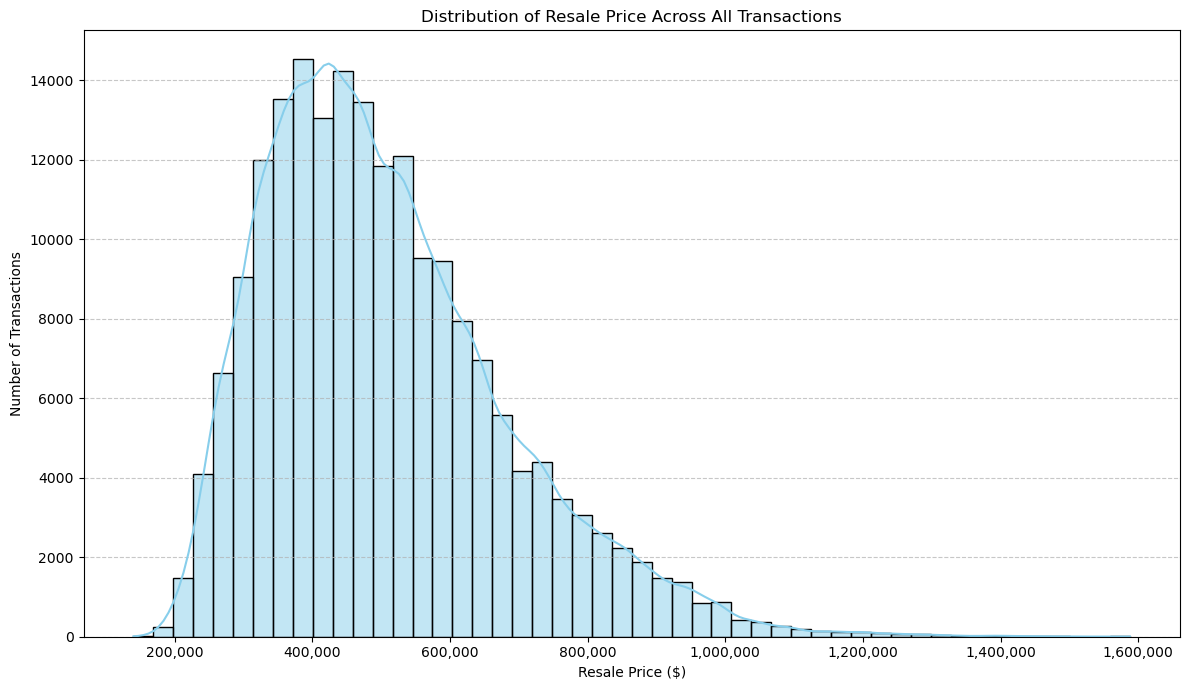

In [24]:
plt.figure(figsize=(12, 7))
sns.histplot(df_upd['resale_price'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Resale Price Across All Transactions')
plt.xlabel('Resale Price ($)')
plt.ylabel('Number of Transactions')

# Format x-axis to display readable numbers
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Results from Histogram:
- Right-skewed distribution = Higher no. of transactions at the lower resale price.
- Presence of higher resale price are rarer.
- Median is a better measure as compared to Mean due to outliers

What it means for the HDB Market?
- Most demand falls under the flats that lie within the $400,000 range.


### Number of Transactions Over Time - Is the Demand increasing?

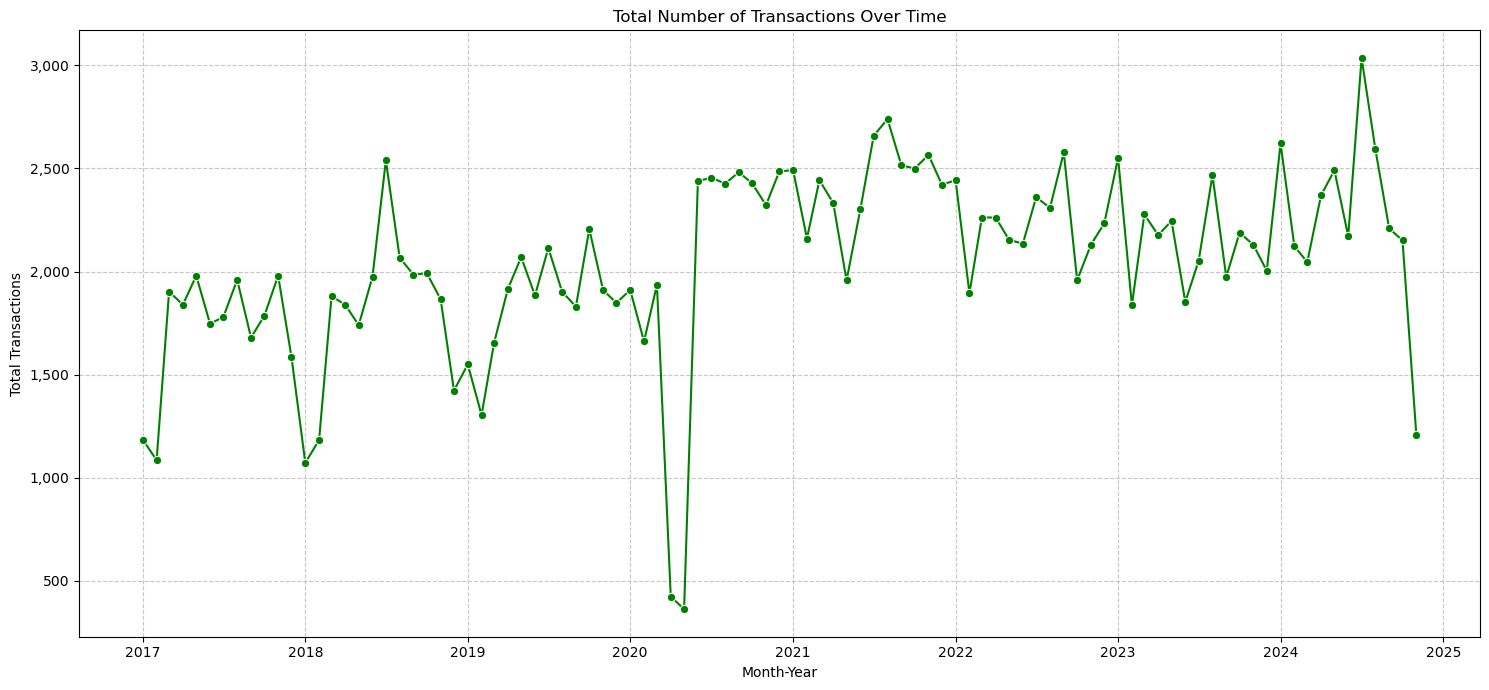

In [26]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Count total transactions per month
transaction_counts = df_upd.groupby('month').size().reset_index(name='total_transactions')

plt.figure(figsize=(15, 7))
sns.lineplot(x='month', y='total_transactions', data=transaction_counts, marker='o', color='green')

plt.title('Total Number of Transactions Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Transactions')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Median Price Analysis
- What is the Median Price Overall
- What is the Median Price per SQM Overall

In [25]:
median_resale_price = df_upd['resale_price'].median()
median_price_per_sqm = df_upd['price_per_sqm'].median()

print(f"Median Resale Price across All Transactions: ${median_resale_price:,.2f}")
print(f"Median Price Per SQM across All Transactions: ${median_price_per_sqm:,.2f}")


Median Resale Price across All Transactions: $475,000.00
Median Price Per SQM across All Transactions: $5,000.00


### Is the HDB Resale Market getting MORE or LESS Affordable?

- Median Prices Over-time

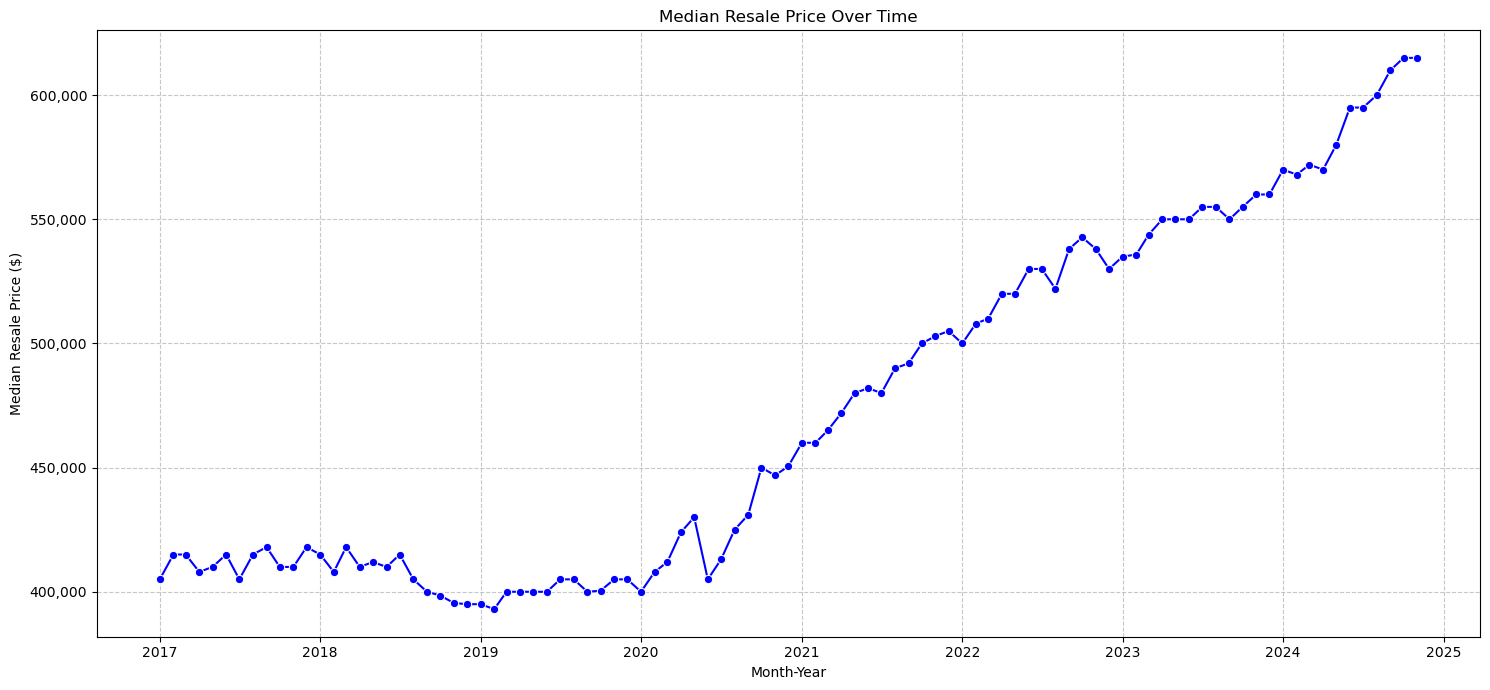

In [27]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Calculate median resale price per month
median_price_over_time = df_upd.groupby('month')['resale_price'].median().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(x='month', y='resale_price', data=median_price_over_time, marker='o', color='blue')

plt.title('Median Resale Price Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Median Resale Price ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Calculate the Inflation Rate of Median Resale Price from 2020 Onwards

In [28]:
# Ensure 'month' column is in datetime format (re-run this in case previous cell modified df_upd)
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Recalculate median resale price per month to ensure correctness
median_resale_price_over_time_corrected = df_upd.groupby('month')['resale_price'].median().reset_index()

# Filter data for the years 2020 to 2025
filtered_median_price_yearly = median_resale_price_over_time_corrected[
    (median_resale_price_over_time_corrected['month'].dt.year >= 2020) &
    (median_resale_price_over_time_corrected['month'].dt.year <= 2025)
].copy()

# Resample to get yearly median prices. Taking the median of the monthly medians for each year.
yearly_median_resale_price = filtered_median_price_yearly.set_index('month').resample('YE')['resale_price'].median().reset_index()
yearly_median_resale_price['year'] = yearly_median_resale_price['month'].dt.year

# Calculate the annual inflation rate (percentage change year over year)
yearly_median_resale_price['inflation_rate'] = yearly_median_resale_price['resale_price'].pct_change() * 100

print("Annual Inflation Rate of Median Resale Price (2020-2025):")
display(yearly_median_resale_price[['year', 'resale_price', 'inflation_rate']].round(2))

Annual Inflation Rate of Median Resale Price (2020-2025):


,year,resale_price,inflation_rate
0,2020,424500.0,NaN
1,2021,481000.0,13.31
2,2022,526000.0,9.36
3,2023,550000.0,4.56
4,2024,595000.0,8.18


- Median Per Sqm Price Over-time

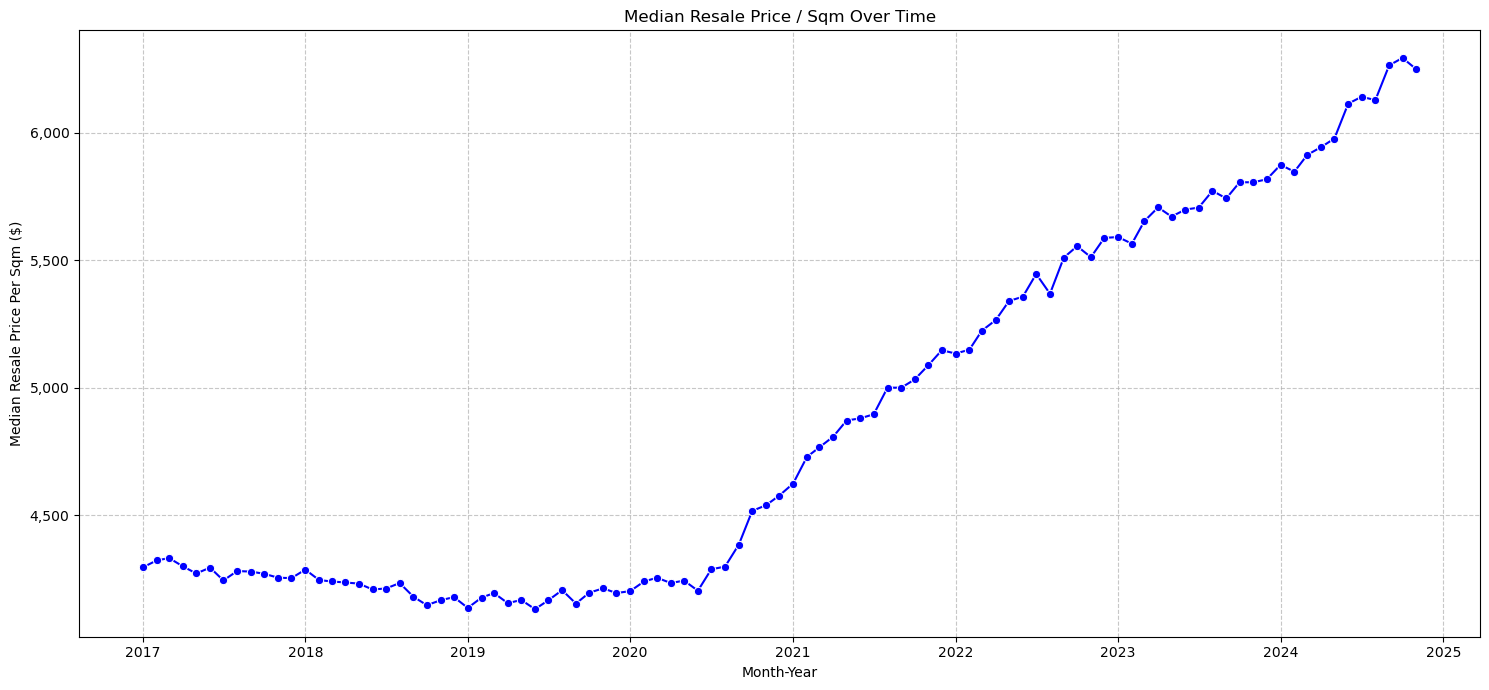

In [29]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Calculate median resale price per sqm per month
median_price_per_sqm_over_time = df_upd.groupby('month')['price_per_sqm'].median().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(x='month', y='price_per_sqm', data=median_price_per_sqm_over_time, marker='o', color='blue')

plt.title('Median Resale Price / Sqm Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Median Resale Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Calculate Inflation Rate for Median Per Sqm Price from 2020 onwards

In [30]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Recalculate median price per sqm per month
median_price_per_sqm_overtime = df_upd.groupby('month')['price_per_sqm'].median().reset_index()

# Filter data for the years 2020 to 2025
filtered_median_per_sqm_yearly = median_price_per_sqm_overtime[
    (median_price_per_sqm_overtime['month'].dt.year >= 2020) &
    (median_price_per_sqm_overtime['month'].dt.year <= 2025)
].copy()

# Resample to get yearly median prices. Taking the median of the monthly medians for each year.
yearly_median_sqm_price = filtered_median_per_sqm_yearly.set_index('month').resample('YE')['price_per_sqm'].median().reset_index()
yearly_median_sqm_price['year'] = yearly_median_sqm_price['month'].dt.year

# Calculate the annual inflation rate (percentage change year over year)
yearly_median_sqm_price['inflation_rate_pps'] = yearly_median_sqm_price['price_per_sqm'].pct_change() * 100

print("Annual Inflation Rate of Median Price Per Sqm (2020-2025):")
display(yearly_median_sqm_price[['year', 'price_per_sqm', 'inflation_rate_pps']].round(2))

Annual Inflation Rate of Median Price Per Sqm (2020-2025):


,year,price_per_sqm,inflation_rate_pps
0,2020,4270.33,NaN
1,2021,4887.65,14.46
2,2022,5363.00,9.73
3,2023,5707.44,6.42
4,2024,6115.11,7.14


Long-term Trend - Compound Annual Growth Rate (CAGR)



In [31]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Calculate yearly median resale price
yearly_median_resale_price_overall = df_upd.groupby(df_upd['month'].dt.year)['resale_price'].median().reset_index()
yearly_median_resale_price_overall.columns = ['year', 'median_resale_price']

# Calculate yearly median price per sqm
yearly_median_price_per_sqm_overall = df_upd.groupby(df_upd['month'].dt.year)['price_per_sqm'].median().reset_index()
yearly_median_price_per_sqm_overall.columns = ['year', 'median_price_per_sqm']

# Define start and end years
start_year = 2017
end_year = yearly_median_resale_price_overall['year'].max() # Get the latest year from the data

# Filter for start and end years
start_price = yearly_median_resale_price_overall[yearly_median_resale_price_overall['year'] == start_year]['median_resale_price'].iloc[0]
end_price = yearly_median_resale_price_overall[yearly_median_resale_price_overall['year'] == end_year]['median_resale_price'].iloc[0]

start_price_per_sqm = yearly_median_price_per_sqm_overall[yearly_median_price_per_sqm_overall['year'] == start_year]['median_price_per_sqm'].iloc[0]
end_price_per_sqm = yearly_median_price_per_sqm_overall[yearly_median_price_per_sqm_overall['year'] == end_year]['median_price_per_sqm'].iloc[0]

# Calculate number of periods
num_years = end_year - start_year

# Calculate CAGR for Median Resale Price
cagr_resale_price = ((end_price / start_price)**(1/num_years) - 1) * 100

# Calculate CAGR for Median Price Per Sqm
cagr_price_per_sqm = ((end_price_per_sqm / start_price_per_sqm)**(1/num_years) - 1) * 100

print(f"CAGR of Median Resale Price ({start_year}-{end_year}): {cagr_resale_price:.2f}%")
print(f"CAGR of Median Price Per Sqm ({start_year}-{end_year}): {cagr_price_per_sqm:.2f}%")

CAGR of Median Resale Price (2017-2024): 5.29%
CAGR of Median Price Per Sqm (2017-2024): 5.11%


### Findings:
- Overall Median Prices over time show an upward trend from 2020 onwards
- However, since 2020, Price Inflation has been showing decreasing trends
- CAGR of Median Prices are around 5%, meaning as of the 2020, the Inflation Rate is still increasing at a greater rate than the CAGR --> **Indicative of Housing becoming Less Affordable.**


## STEP 3.2: STRUCTURAL DRIVERS
- What are the sturctural / physical factors of the houses that people are buying and why are they buying them?


### What are people buying?
- What _______ is most transacted?
  1. Flat Type
  2. Flat Size
  3. Flat Model

  

Flat Type Distribution

Number of flats per flat_type:


flat_type
4 ROOM              81967
5 ROOM              48091
3 ROOM              46071
EXECUTIVE           14301
2 ROOM               3586
MULTI-GENERATION       80
1 ROOM                 74
Name: count, dtype: int64

/var/folders/2w/z7_24rf9307gh7smq49n57mw0000gn/T/ipykernel_63963/2508281703.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_upd['flat_type'], order=df_upd['flat_type'].value_counts().index, palette='viridis', legend=False)


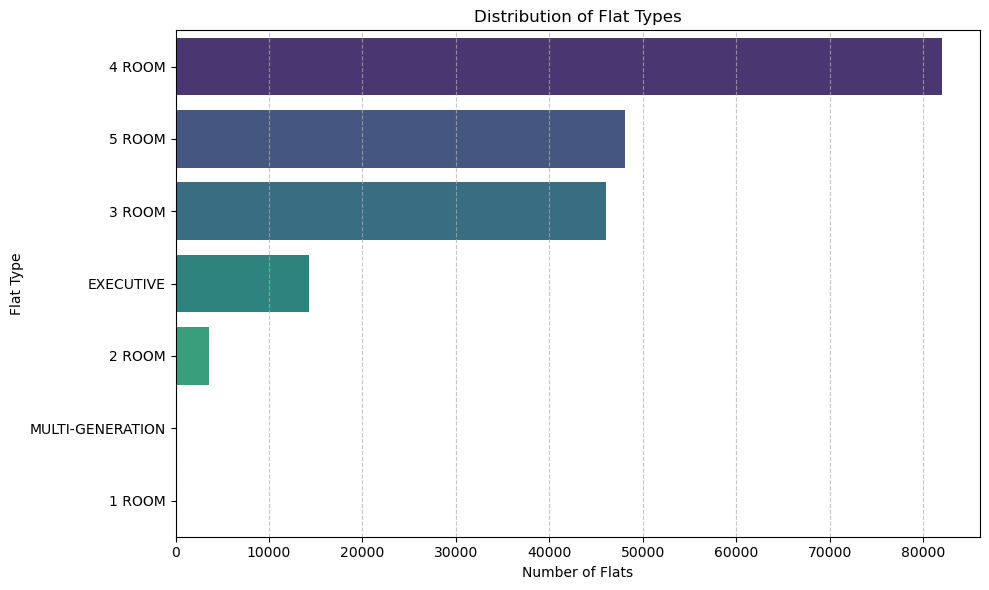

In [32]:
print("Number of flats per flat_type:")
display(df_upd['flat_type'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(y=df_upd['flat_type'], order=df_upd['flat_type'].value_counts().index, palette='viridis', legend=False)
plt.title('Distribution of Flat Types')
plt.xlabel('Number of Flats')
plt.ylabel('Flat Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Flat Model Distribution

Number of flats per flat_model:


flat_model
Model A                   68150
Improved                  47700
New Generation            24008
Premium Apartment         21859
Simplified                 7441
Apartment                  7174
Maisonette                 5475
Standard                   5259
DBSS                       3177
Model A2                   2226
Model A-Maisonette          346
Adjoined flat               338
Type S1                     313
Type S2                     170
2-room                      151
Premium Apartment Loft      109
Terrace                     105
Multi Generation             80
3Gen                         47
Improved-Maisonette          28
Premium Maisonette           14
Name: count, dtype: int64

/var/folders/2w/z7_24rf9307gh7smq49n57mw0000gn/T/ipykernel_63963/3553795900.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_upd['flat_model'], order=df_upd['flat_model'].value_counts().index, palette='viridis', legend=False)


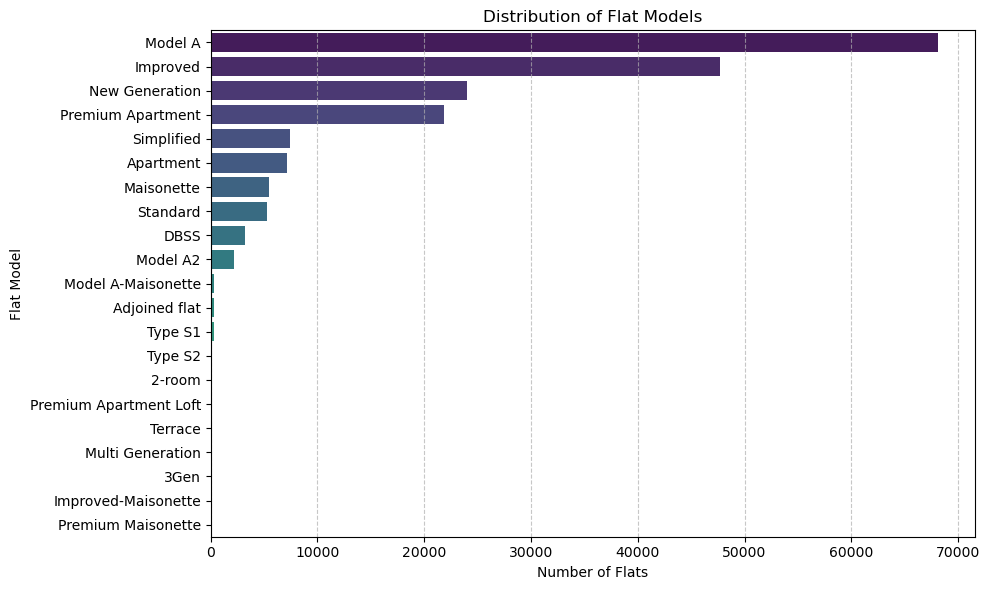

In [33]:
print("Number of flats per flat_model:")
display(df_upd['flat_model'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(y=df_upd['flat_model'], order=df_upd['flat_model'].value_counts().index, palette='viridis', legend=False)
plt.title('Distribution of Flat Models')
plt.xlabel('Number of Flats')
plt.ylabel('Flat Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Findings:
- Most Popular Flat Types:
  1. 4 Room (81967)
  2. 5 Room (48091)
  3. 3 Room (46071)
  4. Exec (14301)

- Most Popular Flat Size (floor_area_sqm):
  1. 93 (15507)
  2. 92 (12225)
  3. 67 (11834)
  4. 110 (8907)

- Most Popular Flat Model:
  1. Model A	(68150)
  2. Improved	(47700)
  3. New Generation	(24008)
  4. Premium Apartment	(21859)

> This is overall is indicative of the Supply and Demand in the Housing Market

Count of Unique Floor Areas / Flat Type

In [34]:
unique_floor_area_by_flat_type = df.groupby('flat_type')['floor_area_sqm'].nunique().reset_index() # Group the Dataframe by 'flat_type' and count the number of unique 'floor_area_sqm' values for each flat type. The result is then reset to a DataFrame.
unique_floor_area_by_flat_type = unique_floor_area_by_flat_type.rename(columns={'floor_area_sqm': 'number_of_unique_floor_areas'}) # Rename the 'floor_area_sqm' column to 'number_of_unique_floor_areas' for clarity.
display(unique_floor_area_by_flat_type.sort_values(by='number_of_unique_floor_areas', ascending=False)) # Display the resulting Dataframe, sorted in descending order by the number of unique floor areas.

total_unique_floor_areas = unique_floor_area_by_flat_type['number_of_unique_floor_areas'].sum() # Calculate the sum of all unique floor areas listed per flat type.
print(f"\nTotal sum of unique floor areas across all flat types: {total_unique_floor_areas}") # Display the total sum of unique floor areas.

,flat_type,number_of_unique_floor_areas
2,3 ROOM,90
5,EXECUTIVE,68
3,4 ROOM,65
4,5 ROOM,58
1,2 ROOM,28
6,MULTI-GENERATION,15
0,1 ROOM,1



Total sum of unique floor areas across all flat types: 325


### Findings:

- 1 Room Flats: Consist of only 1 size, 31sqm
- 2 Room Flats: Consist of 28 sizes ranging approx. 35-65sqm, with majority in the 40-55sqm range.
- 3 Room Flats: Consist of 90 sizes ranging approx. 50-350sqm, with majority in the 50-100sqm range, with *350sqm being an outlier.*
- 4 Room Flats: Consist of 65 sizes ranging approx. 65- <180sqm, majority in the 80-140sqm range, with *>160 being an outlier*
- 5 Room Flats: Consist of 58 sizes ranging approx. 100-170sqm, with majority in the 110-160sqm range, with no extreme outliers.
- Executive Flats: Consist of 65 sizes, ranging approx. >120-245sqm, with majority in the >120-200sqm range, with *>240sqm being an outlier*
- Multi-Gen Flats: Consist of 15 sizes ranging approx.>130-<180sqm, with majority in the 160-170sqm range.

### What does this mean for our analysis?

*   1 Room Flat
>When evaluating we only need to consider 1 flat size.
*  Others
> When evaluating, take note of outliers and understand why the outliers are there? Could it be related to flat model? Could it be related to flat age?




Resale Price Per Sqm Distribution by Floor Area (Smallest to Largest)

#### How does Flat Type / Flat Model affect Pricing?

Median Resale Price Per Sqm Distribution by Flat Type

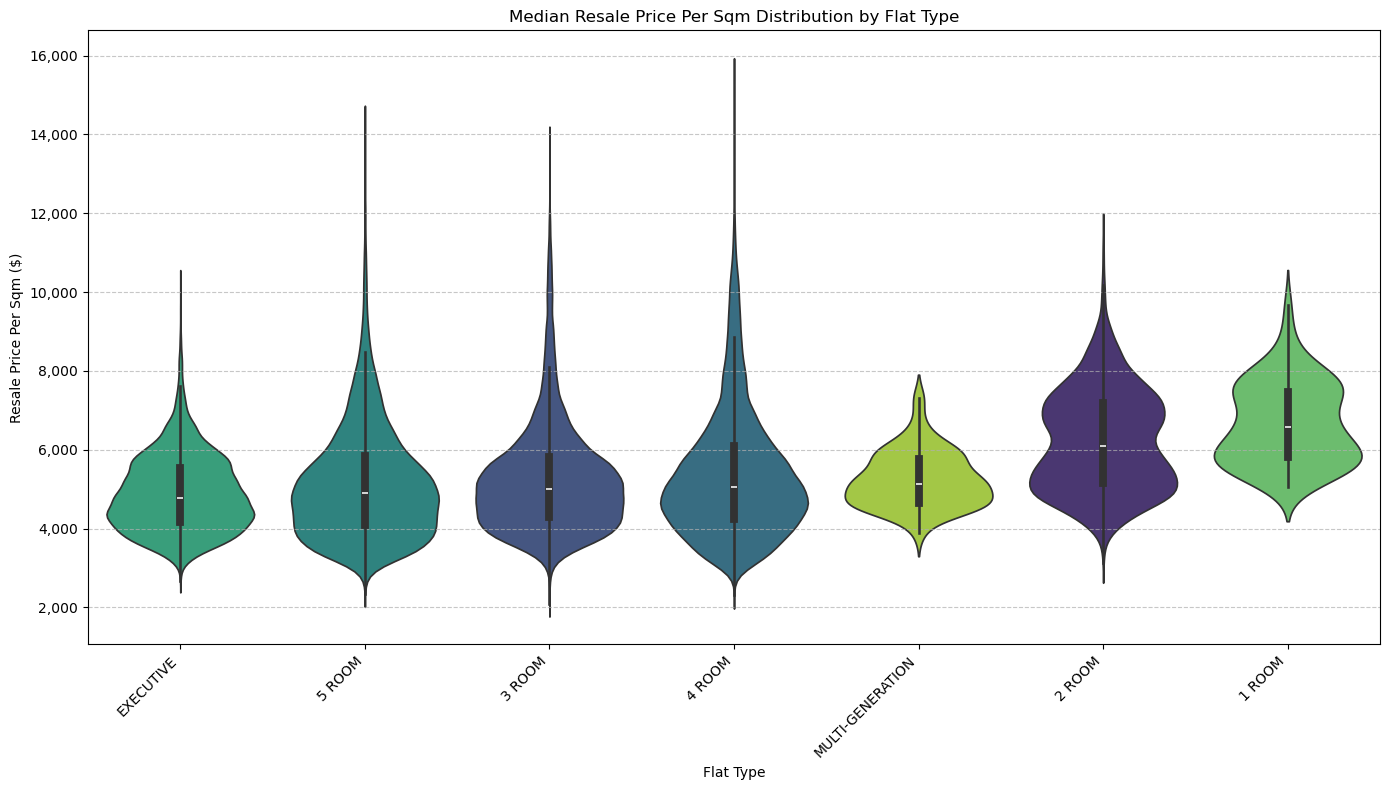

In [36]:
# Calculate the median price_per_sqm for each flat_type and sort them
median_price_per_sqm_by_flat_type = df_upd.groupby('flat_type')['price_per_sqm'].median().sort_values(ascending=True)
sorted_flat_types = median_price_per_sqm_by_flat_type.index

plt.figure(figsize=(14, 8))
sns.violinplot(x='flat_type', y='price_per_sqm', data=df_upd, order=sorted_flat_types, palette='viridis', hue='flat_type', legend=False)

plt.title('Median Resale Price Per Sqm Distribution by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Median Resale Price Per Sqm Over Time by Flat Type
- Informs us on price trends specific to flat type over the years
- Which flat types are becoming more / less affordable

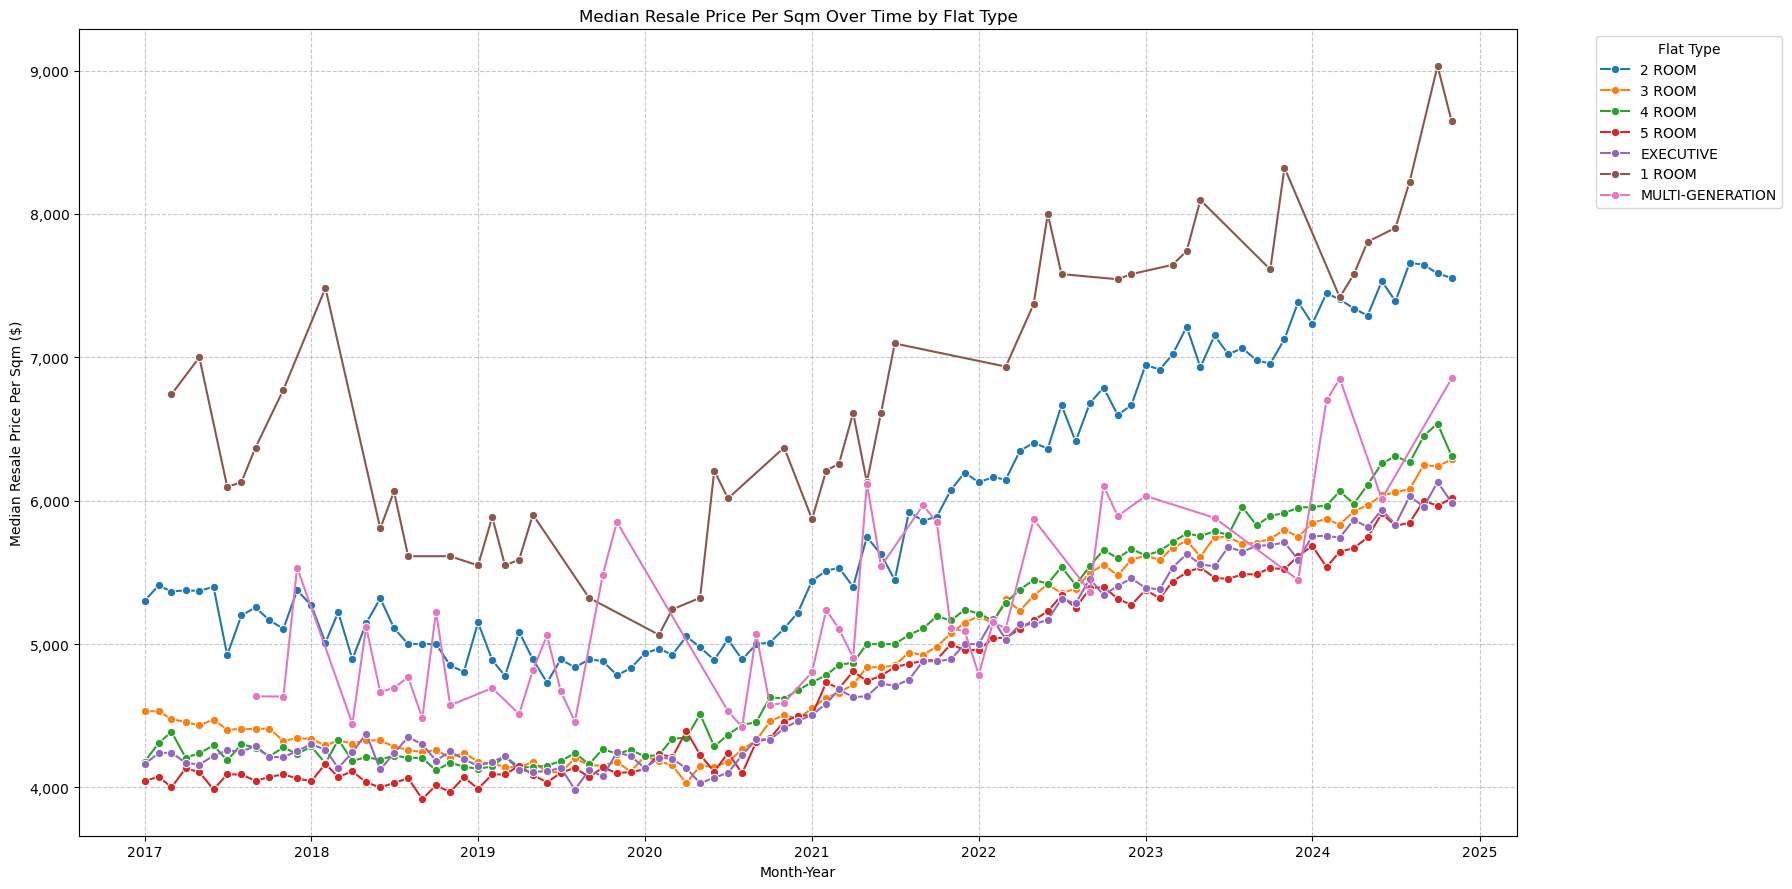

In [37]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Calculate median price_per_sqm per month for each flat_type
median_price_per_sqm_by_flat_type_over_time = df_upd.groupby(['month', 'flat_type'])['price_per_sqm'].median().reset_index()

plt.figure(figsize=(18, 9))
sns.lineplot(x='month', y='price_per_sqm', hue='flat_type', data=median_price_per_sqm_by_flat_type_over_time, marker='o', palette='tab10')

plt.title('Median Resale Price Per Sqm Over Time by Flat Type')
plt.xlabel('Month-Year')
plt.ylabel('Median Resale Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Flat Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## STEP 3.3 TEMPORAL DRIVERS
- Understanding Temporal Factors, and how it affects the Housing Market
>* Flat Age
>* Location

Let's take a look at Flat Age (Remaining Lease)

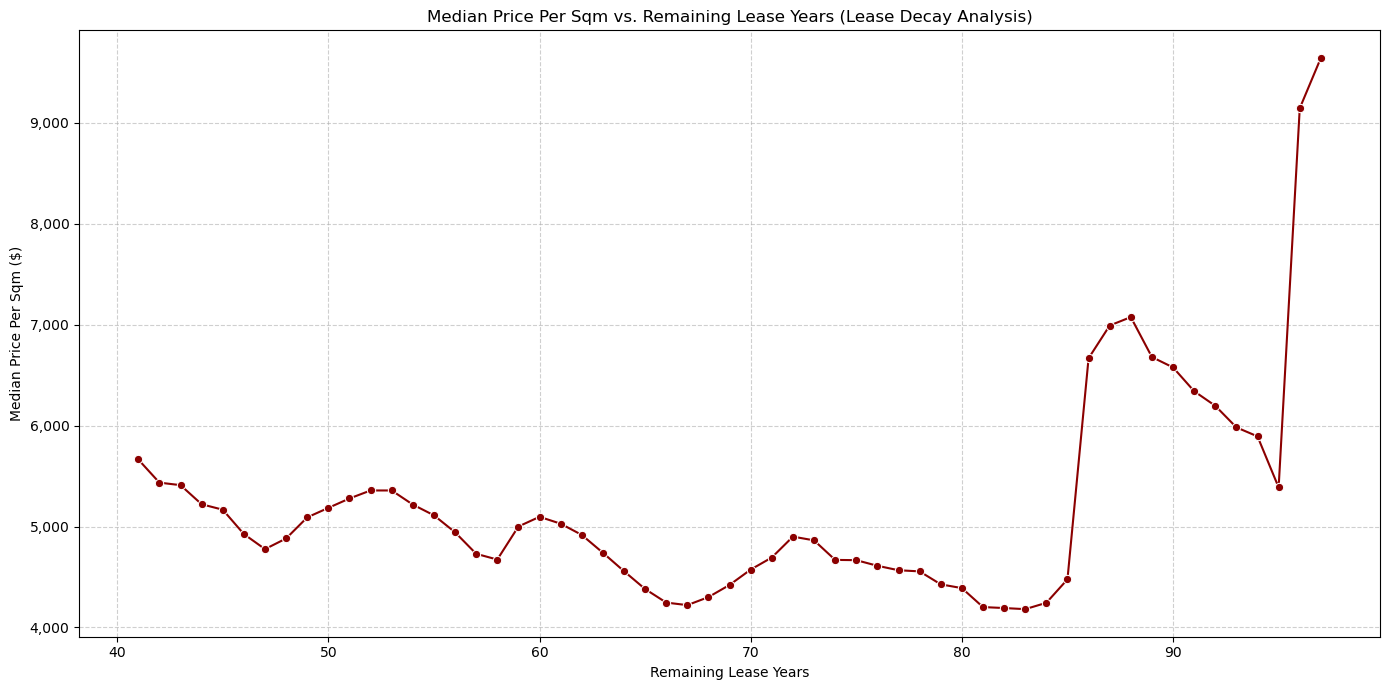

In [38]:
# Calculate median price_per_sqm for each remaining_lease_years
lease_decay_data = df_upd.groupby('remaining_lease_years')['price_per_sqm'].median().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='remaining_lease_years', y='price_per_sqm', data=lease_decay_data, marker='o', color='darkred')

plt.title('Median Price Per Sqm vs. Remaining Lease Years (Lease Decay Analysis)')
plt.xlabel('Remaining Lease Years')
plt.ylabel('Median Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Analysing the relationship between Locational/Temporal Factors and Resale Price

In [39]:
unique_towns = df_upd['town'].unique()
print("Unique Towns:")
for town in unique_towns:
    print(town)

Unique Towns:
ANG MO KIO
BEDOK
BISHAN
BUKIT BATOK
BUKIT MERAH
BUKIT PANJANG
BUKIT TIMAH
CENTRAL AREA
CHOA CHU KANG
CLEMENTI
GEYLANG
HOUGANG
JURONG EAST
JURONG WEST
KALLANG/WHAMPOA
MARINE PARADE
PASIR RIS
PUNGGOL
QUEENSTOWN
SEMBAWANG
SENGKANG
SERANGOON
TAMPINES
TOA PAYOH
WOODLANDS
YISHUN


Price Per Sqm Distribution by Town
- Informs us on affordability per town

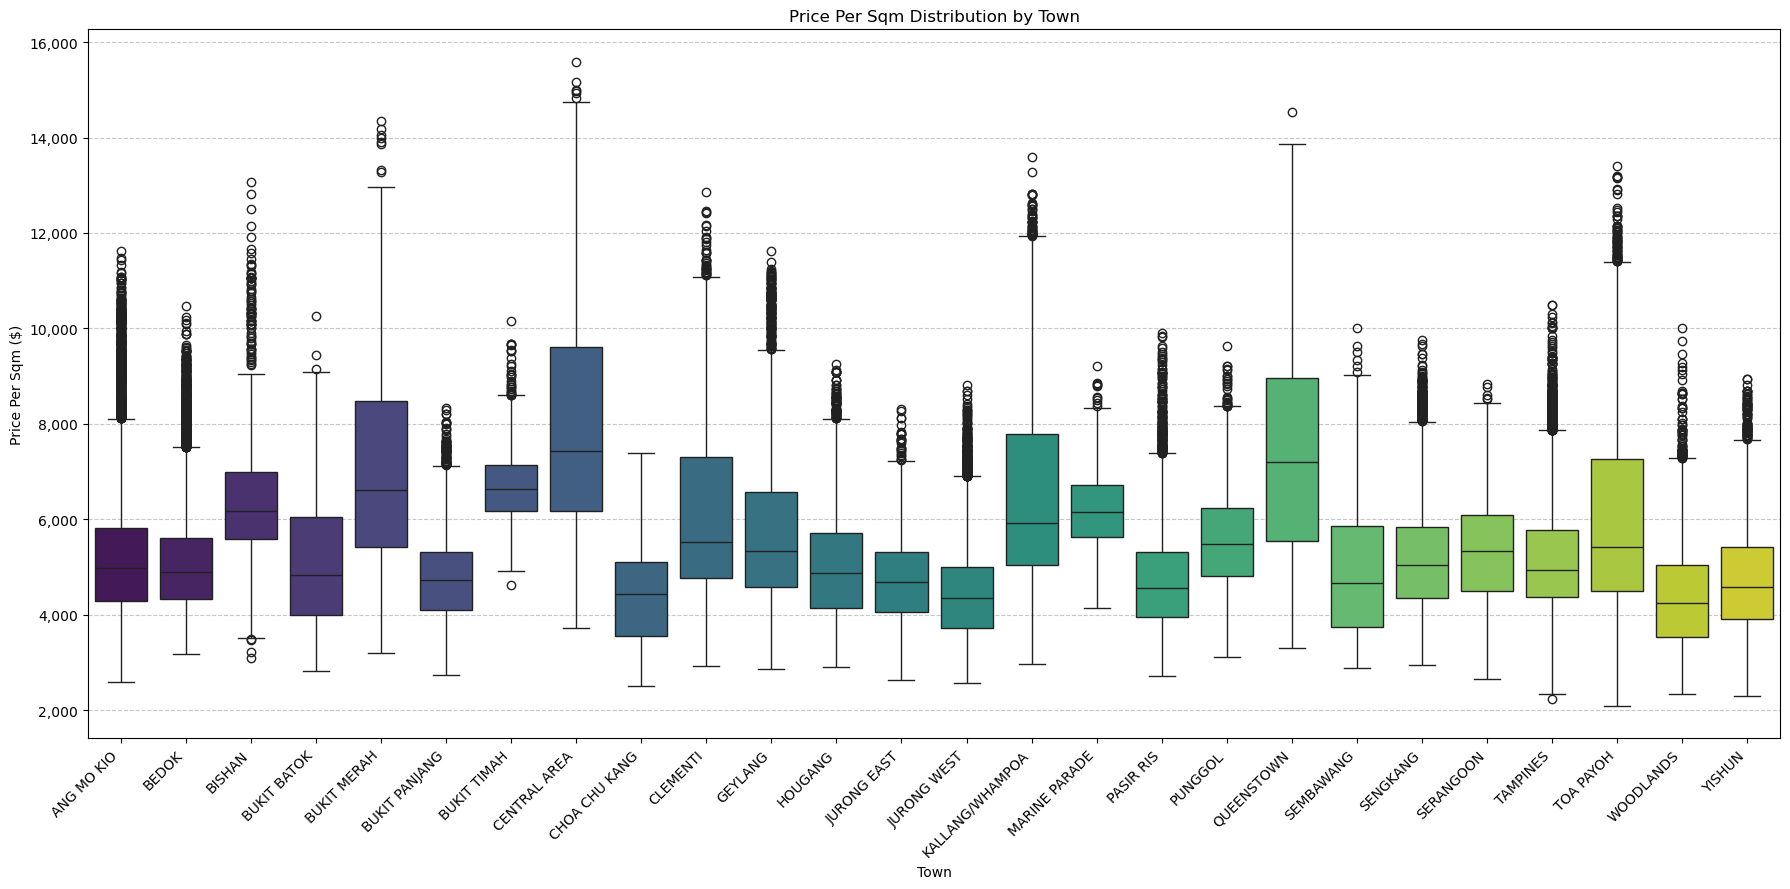

In [40]:
plt.figure(figsize=(18, 9))
sns.boxplot(x='town', y='price_per_sqm', data=df_upd, palette='viridis', hue='town', legend=False)
plt.title('Price Per Sqm Distribution by Town')
plt.xlabel('Town')
plt.ylabel('Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Distribution of Remaining Lease by Town
- Tells us the supply of older/younger flats in each town
- Informs us on Housing Stock

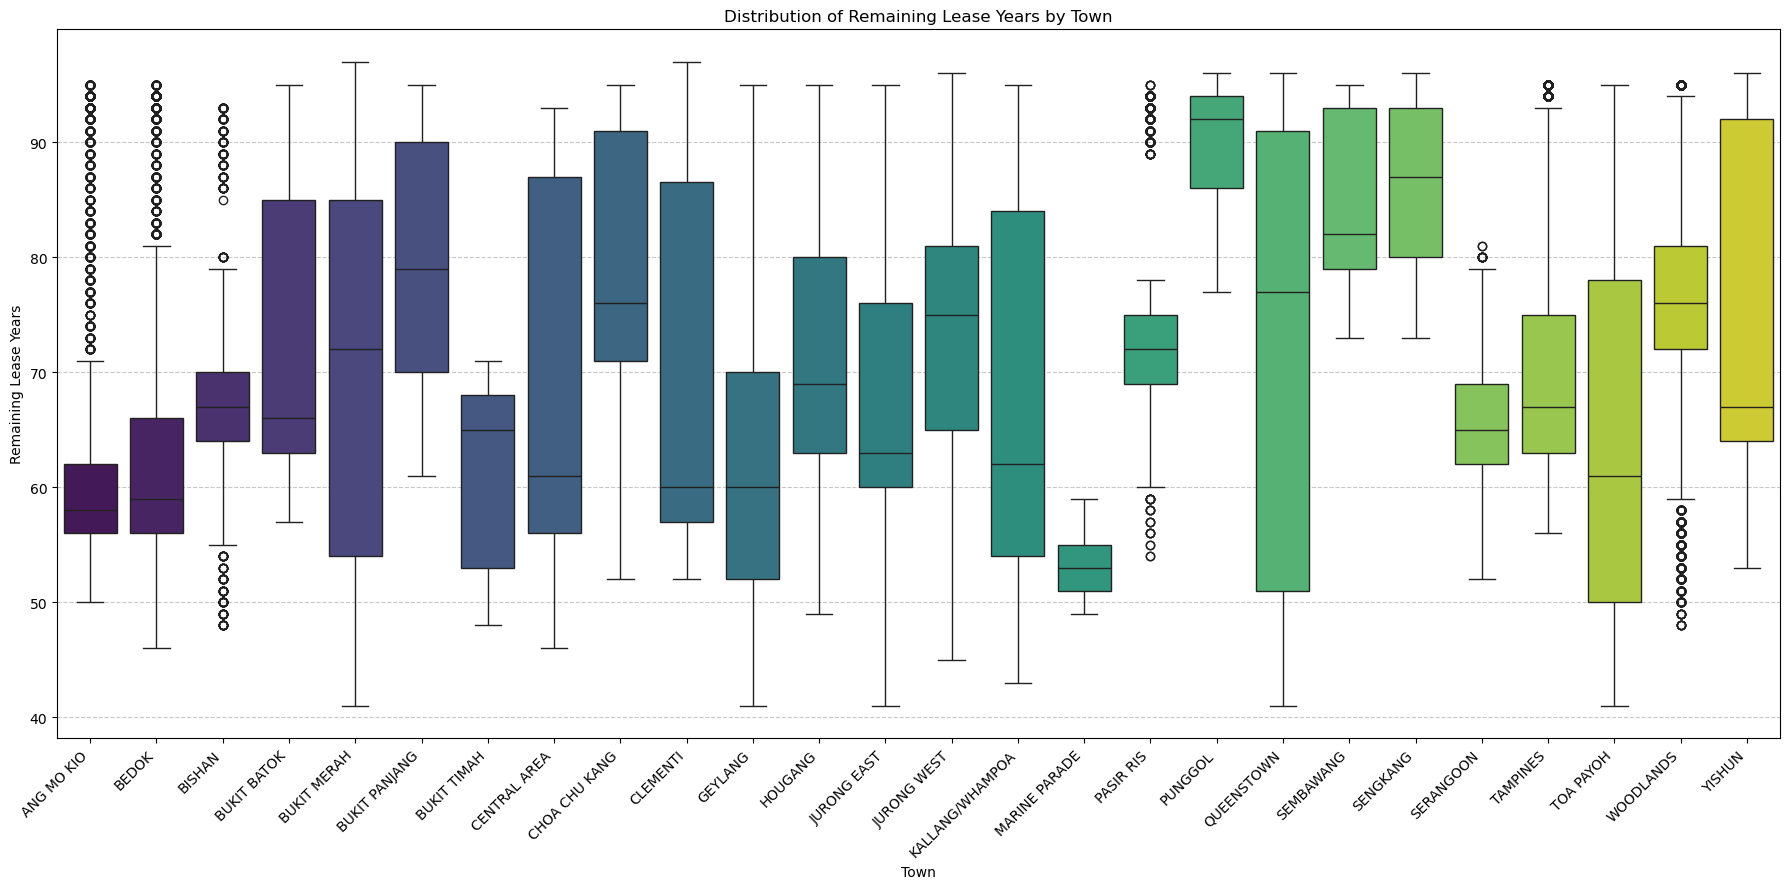

In [41]:
plt.figure(figsize=(18, 9))
sns.boxplot(x='town', y='remaining_lease_years', data=df_upd, palette='viridis', hue='town', legend=False)
plt.title('Distribution of Remaining Lease Years by Town')
plt.xlabel('Town')
plt.ylabel('Remaining Lease Years')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Heat Map of Town x Flat Type

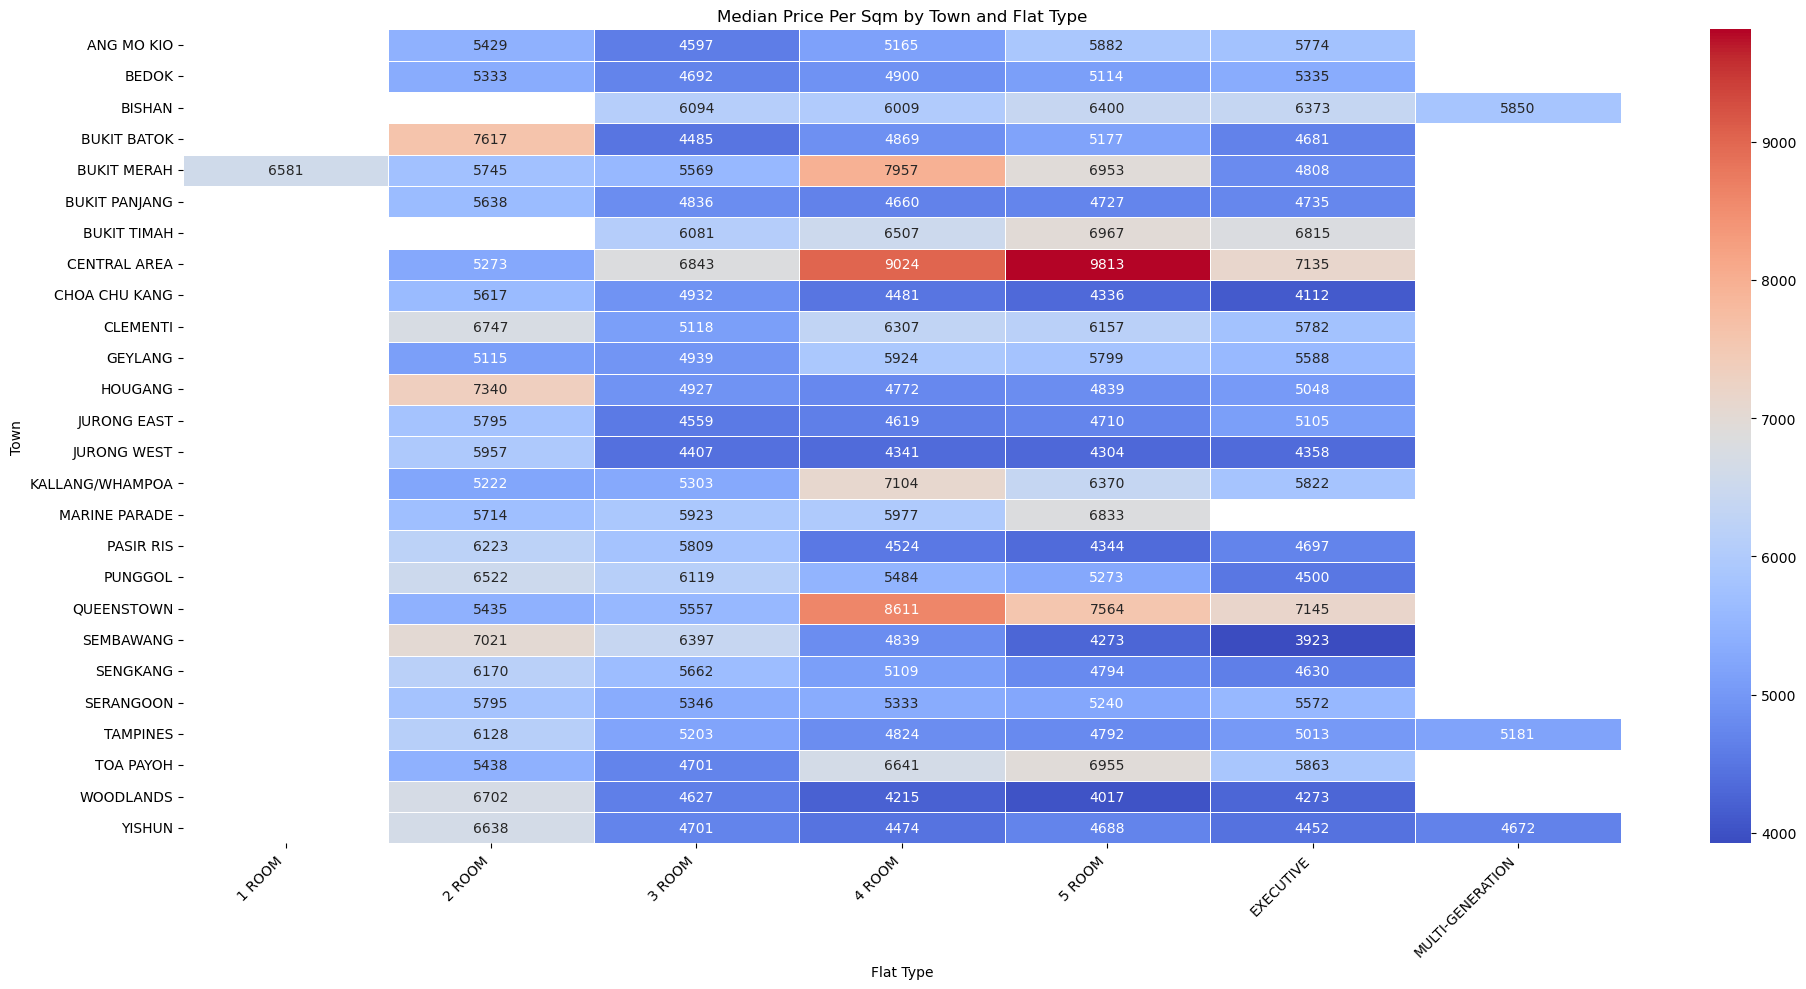

In [42]:
# Calculate median price_per_sqm for each town and flat_type
median_price_per_sqm_pivot = df_upd.groupby(['town', 'flat_type'])['price_per_sqm'].median().unstack()

plt.figure(figsize=(20, 10)) # Adjust figure size for readability
sns.heatmap(median_price_per_sqm_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=.5)
plt.title('Median Price Per Sqm by Town and Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Town')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## STEP 4: PREPPING DATA FOR MODELLING
- Clean and Encode
- Add Essential Features
- Drop Unneccesary Features
- Check multicollinarity
- Check correlation
- Select Features for Modelling


## 4.1 Clean and Encode Data
- Categorical data into Numerical data - such as Town, Flat Type, Flat_Model , etc.

In [43]:
df_upd.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,5272.727273,2017,38,61.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,3731.343284,2017,39,60.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,3910.447761,2017,37,62.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,3897.058824,2017,37,62.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,3955.223881,2017,37,62.0


Adding in Contextual Stats Encoding
- by Town and by Flat Type


In [44]:
# Town-level Stats
# Calculate town-level statistics directly using the 'town' column
town_stats = (
    df_upd.groupby('town')
          .agg(
              town_median_psqm = ('price_per_sqm', 'median'),
              town_mean_psqm   = ('price_per_sqm', 'mean'),
              town_avg_lease   = ('remaining_lease_years', 'mean'),
              town_count       = ('resale_price', 'count')
          )
          .reset_index()
)

# Merge stats back into df_upd using the 'town' column
df_upd = df_upd.merge(town_stats, on='town', how='left')

In [45]:
print("DataFrame after adding town-level statistics:")
display(df_upd.sample(5))

DataFrame after adding town-level statistics:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years,town_median_psqm,town_mean_psqm,town_avg_lease,town_count
7671,2017-05-01,TOA PAYOH,4 ROOM,226,LOR 8 TOA PAYOH,16 TO 18,82.0,Improved,1976,353000.0,4304.878049,2017,41,58.0,5416.666667,6014.104839,64.328937,6065
76631,2020-08-01,MARINE PARADE,5 ROOM,3,MARINE TER,22 TO 24,120.0,Standard,1975,868000.0,7233.333333,2020,45,53.0,6153.846154,6214.958926,53.027848,1185
152668,2023-05-01,BUKIT MERAH,4 ROOM,26B,JLN MEMBINA,16 TO 18,85.0,Model A,2009,855000.0,10058.823529,2023,14,84.0,6622.222222,7015.083643,70.311769,7435
68797,2020-03-01,PASIR RIS,4 ROOM,700,PASIR RIS DR 10,04 TO 06,111.0,Model A,1996,430000.0,3873.873874,2020,24,74.0,4571.428571,4749.653807,73.626165,5687
30325,2018-07-01,BEDOK,3 ROOM,19,CHAI CHEE RD,01 TO 03,65.0,Improved,1972,265000.0,4076.923077,2018,46,53.0,4886.363636,5122.384193,63.321181,10231


In [46]:
# Flat_type-level Stats
# Calculate flat-type-level statistics directly using the 'flat_type' column
flat_type_stats = (
    df_upd.groupby('flat_type')
          .agg(
              flat_type_median_psqm = ('price_per_sqm', 'median'),
              flat_type_mean_psqm   = ('price_per_sqm', 'mean'),
              flat_type_avg_lease   = ('remaining_lease_years', 'mean'),
              flat_type_count       = ('resale_price', 'count')
          )
          .reset_index()
)

# Merge stats back into df_upd using the 'flat_type' column
df_upd = df_upd.merge(flat_type_stats, on='flat_type', how='left')

In [47]:
print("DataFrame after adding flat-type level statistics:")
display(df_upd.sample(15
                    ))

DataFrame after adding flat-type level statistics:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,flat_age,remaining_lease_years,town_median_psqm,town_mean_psqm,town_avg_lease,town_count,flat_type_median_psqm,flat_type_mean_psqm,flat_type_avg_lease,flat_type_count
109209,2021-10-01,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1977,328000.0,...,44,54.0,4978.260870,5332.047492,63.132198,7988,5000.000000,5255.275896,64.795815,46071
1612,2017-02-01,JURONG EAST,3 ROOM,412,PANDAN GDNS,10 TO 12,72.0,Improved,1979,260000.0,...,38,61.0,4680.851064,4728.555149,67.934723,3983,5000.000000,5255.275896,64.795815,46071
23489,2018-03-01,JURONG EAST,3 ROOM,318,JURONG EAST ST 31,01 TO 03,74.0,Model A,1984,290000.0,...,34,65.0,4680.851064,4728.555149,67.934723,3983,5000.000000,5255.275896,64.795815,46071
4730,2017-04-01,CLEMENTI,3 ROOM,424,CLEMENTI AVE 1,13 TO 15,75.0,Model A,2013,520000.0,...,4,95.0,5522.388060,6134.579664,67.612457,4335,5000.000000,5255.275896,64.795815,46071
148374,2023-03-01,CHOA CHU KANG,5 ROOM,472,CHOA CHU KANG AVE 3,07 TO 09,120.0,Improved,1999,550000.0,...,24,75.0,4437.500000,4415.199783,78.637448,8887,4900.000000,5139.315966,76.972926,48091
97668,2021-05-01,GEYLANG,5 ROOM,39,JLN TIGA,16 TO 18,111.0,Improved,2005,908000.0,...,16,82.0,5342.173048,5745.120376,62.987222,4774,4900.000000,5139.315966,76.972926,48091
18083,2017-11-01,PUNGGOL,4 ROOM,269B,PUNGGOL FIELD,07 TO 09,93.0,Premium Apartment,2013,430000.0,...,4,94.0,5489.843414,5546.687029,89.791701,14436,5049.504950,5374.938855,77.739176,81967
65046,2020-01-01,JURONG WEST,4 ROOM,272A,JURONG WEST ST 24,07 TO 09,93.0,Premium Apartment,2003,347000.0,...,17,82.0,4360.902256,4445.133913,73.784109,12863,5049.504950,5374.938855,77.739176,81967
49725,2019-05-01,PUNGGOL,EXECUTIVE,116,EDGEFIELD PLAINS,16 TO 18,130.0,Premium Apartment,2003,575000.0,...,16,83.0,5489.843414,5546.687029,89.791701,14436,4771.428571,4894.768830,71.468918,14301
184862,2024-07-01,QUEENSTOWN,4 ROOM,87,DAWSON RD,19 TO 21,83.0,Premium Apartment,2016,970000.0,...,8,91.0,7200.000000,7326.297980,71.074546,5339,5049.504950,5374.938855,77.739176,81967


Clean-up Numerical Values
- Storey Range (take average)

In [48]:
def convert_storey_range_to_avg(storey_range_str):
    if pd.isna(storey_range_str):
        return np.nan
    parts = storey_range_str.split(' TO ')
    if len(parts) == 2:
        try:
            lower = int(parts[0])
            upper = int(parts[1])
            return (lower + upper) / 2
        except ValueError:
            return np.nan # Handle cases where conversion to int fails
    return np.nan # Handle unexpected formats

# Apply the conversion function to create a new 'storey_avg' column
df_upd['storey_avg'] = df_upd['storey_range'].apply(convert_storey_range_to_avg)

# Display a sample of the updated DataFrame with the new 'storey_avg' column
print("DataFrame after converting 'storey_range' to 'storey_avg':")
display(df_upd[['storey_range', 'storey_avg']].sample(10))

DataFrame after converting 'storey_range' to 'storey_avg':


,storey_range,storey_avg
24035,07 TO 09,8.0
148133,07 TO 09,8.0
18971,10 TO 12,11.0
116012,13 TO 15,14.0
135846,13 TO 15,14.0
26232,16 TO 18,17.0
152649,22 TO 24,23.0
64258,01 TO 03,2.0
19837,04 TO 06,5.0
133896,01 TO 03,2.0


### Load All Numerical Columns

In [49]:
numerical_cols_upd = df_upd.select_dtypes(include=np.number).columns
print("Numerical Columns:")
for col in numerical_cols_upd:
    print(col)

Numerical Columns:
floor_area_sqm
lease_commence_date
resale_price
price_per_sqm
trans_year
flat_age
remaining_lease_years
town_median_psqm
town_mean_psqm
town_avg_lease
town_count
flat_type_median_psqm
flat_type_mean_psqm
flat_type_avg_lease
flat_type_count
storey_avg


Check for Missing Values (in Numerical Columns)

In [50]:
print("Missing values in numerical columns:")
print(df_upd[numerical_cols_upd].isnull().sum())

Missing values in numerical columns:
floor_area_sqm           0
lease_commence_date      0
resale_price             0
price_per_sqm            0
trans_year               0
flat_age                 0
remaining_lease_years    0
town_median_psqm         0
town_mean_psqm           0
town_avg_lease           0
town_count               0
flat_type_median_psqm    0
flat_type_mean_psqm      0
flat_type_avg_lease      0
flat_type_count          0
storey_avg               0
dtype: int64


### Round All Values to 4 d.p.

In [51]:
# Identify numerical columns
numerical_cols = df_upd.select_dtypes(include=np.number).columns

# Round all numerical columns to 4 decimal places
df_upd[numerical_cols] = df_upd[numerical_cols].round(4)

print("DataFrame after rounding all numerical values to 4 decimal places:")
display(df_upd.head())

DataFrame after rounding all numerical values to 4 decimal places:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,remaining_lease_years,town_median_psqm,town_mean_psqm,town_avg_lease,town_count,flat_type_median_psqm,flat_type_mean_psqm,flat_type_avg_lease,flat_type_count,storey_avg
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,...,61.0,4978.2609,5332.0475,63.1322,7988,6086.9565,6212.5195,79.9057,3586,11.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,...,60.0,4978.2609,5332.0475,63.1322,7988,5000.0000,5255.2759,64.7958,46071,2.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,...,62.0,4978.2609,5332.0475,63.1322,7988,5000.0000,5255.2759,64.7958,46071,2.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,...,62.0,4978.2609,5332.0475,63.1322,7988,5000.0000,5255.2759,64.7958,46071,5.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,...,62.0,4978.2609,5332.0475,63.1322,7988,5000.0000,5255.2759,64.7958,46071,2.0


### Check for Correlation
- Highly correlated features break regression.

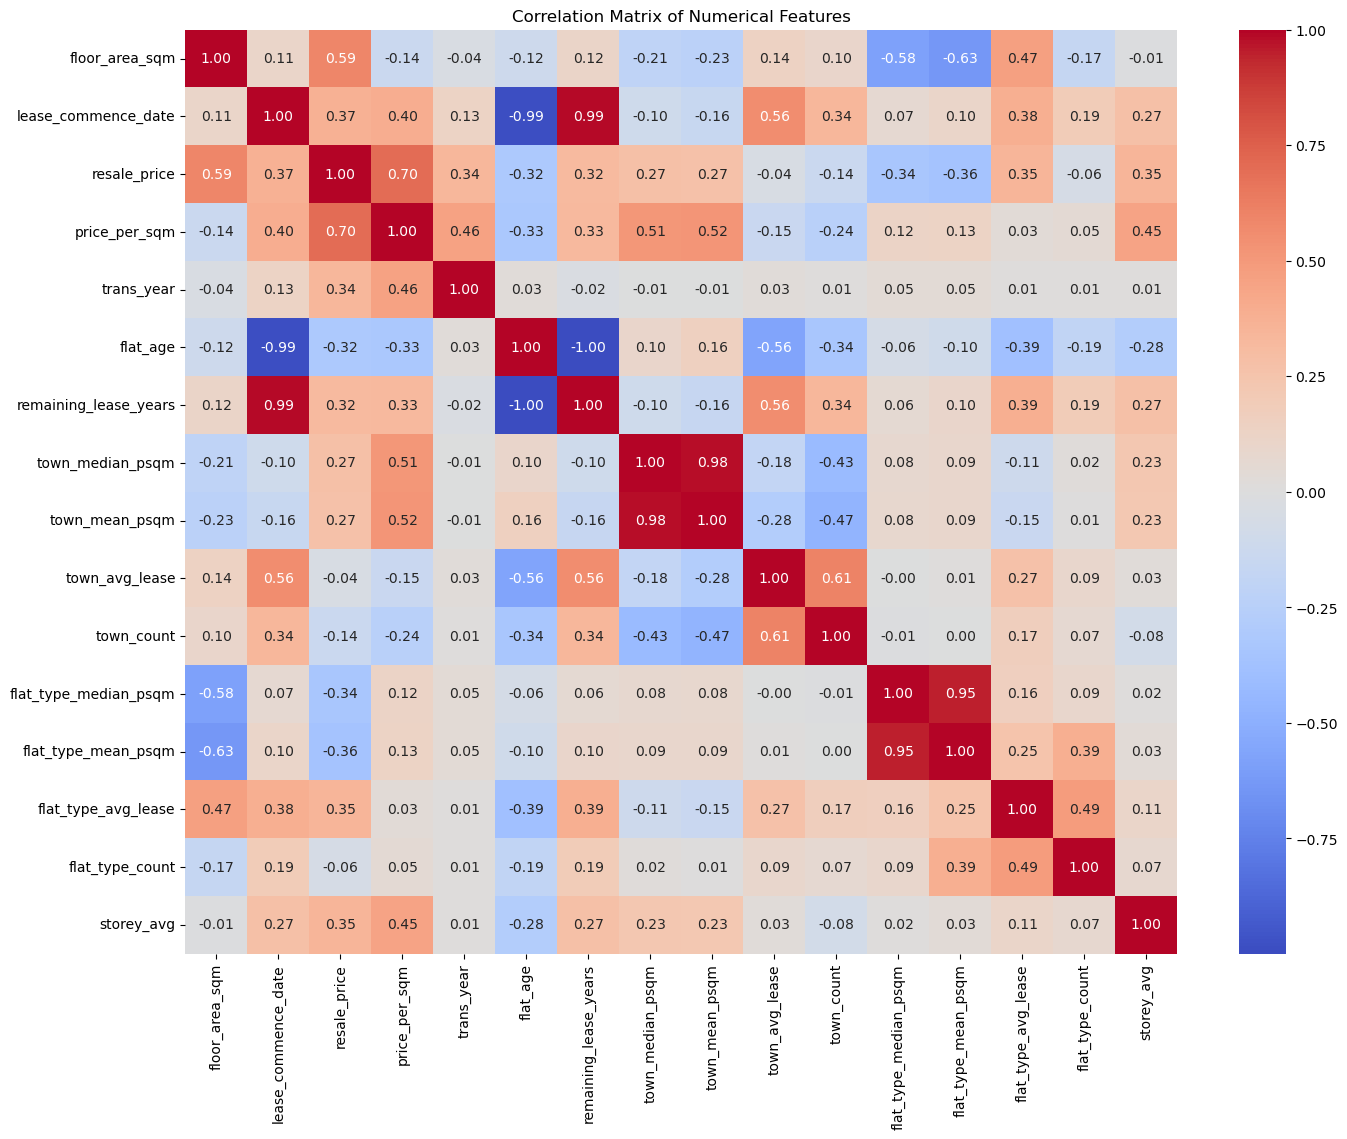

In [52]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_upd.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Findings:
- Consider dropping: lease_commence_date VS remaining_lease_years VS flat_age
- AND mean values (due to right-skewed data, mean values are not reliable)

### One Hot Encoding for Town and Flat_Type

In [53]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_town = encoder.fit_transform(df_upd[['town']])
encoded_town_df = pd.DataFrame(encoded_town, columns=encoder.get_feature_names_out(['town']), index=df_upd.index)
df_upd = pd.concat([df_upd, encoded_town_df], axis=1)
df_upd = df_upd.drop('town', axis=1)

In [54]:
display(df_upd.sample(10))

,month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,...,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
110487,2021-10-01,3 ROOM,314B,PUNGGOL WAY,07 TO 09,68.0,Premium Apartment,2017,412000.0,6058.8235,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157820,2023-07-01,5 ROOM,122D,RIVERVALE DR,13 TO 15,110.0,Improved,2000,580000.0,5272.7273,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
82579,2020-10-01,4 ROOM,840,WOODLANDS ST 82,07 TO 09,84.0,Simplified,1994,330000.0,3928.5714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65328,2020-01-01,4 ROOM,168C,PUNGGOL FIELD,13 TO 15,93.0,Model A,2014,443000.0,4763.4409,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3623,2017-03-01,4 ROOM,277B,COMPASSVALE LINK,04 TO 06,90.0,Premium Apartment,2009,505800.0,5620.0000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25376,2018-04-01,4 ROOM,445,HOUGANG AVE 8,10 TO 12,105.0,Model A,1990,422000.0,4019.0476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43730,2019-02-01,4 ROOM,513,BEDOK NTH AVE 2,07 TO 09,92.0,New Generation,1979,398000.0,4326.0870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77756,2020-08-01,4 ROOM,430A,YISHUN AVE 11,07 TO 09,92.0,Model A,2015,365000.0,3967.3913,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49236,2019-05-01,4 ROOM,405,HOUGANG AVE 10,10 TO 12,93.0,New Generation,1985,410000.0,4408.6022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40092,2018-11-01,5 ROOM,145,RIVERVALE DR,07 TO 09,116.0,Improved,1999,413000.0,3560.3448,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Flat_Type

In [55]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_flat_type = encoder.fit_transform(df_upd[['flat_type']])
encoded_flat_type_df = pd.DataFrame(encoded_flat_type, columns=encoder.get_feature_names_out(['flat_type']), index=df_upd.index)
df_upd = pd.concat([df_upd, encoded_flat_type_df], axis=1)
df_upd = df_upd.drop('flat_type', axis=1)


In [56]:
print("DataFrame after one-hot encoding 'flat_type' column:")
display(df_upd.sample(14))

DataFrame after one-hot encoding 'flat_type' column:


,month,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,...,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION
15224,2017-10-01,588C,ANG MO KIO ST 52,16 TO 18,90.0,DBSS,2011,670000.0,7444.4444,2017,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
111123,2021-10-01,237,TAMPINES ST 21,07 TO 09,73.0,Model A,1984,385000.0,5273.9726,2021,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
157090,2023-07-01,64,TEBAN GDNS RD,19 TO 21,90.0,Model A,2003,495000.0,5500.0000,2023,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
64914,2020-01-01,988B,BUANGKOK GREEN,07 TO 09,93.0,Model A,2015,460000.0,4946.2366,2020,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38329,2018-10-01,222,SIMEI ST 4,04 TO 06,104.0,Model A,1988,430000.0,4134.6154,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32078,2018-07-01,430D,FERNVALE LINK,13 TO 15,112.0,Improved,2015,525000.0,4687.5000,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7724,2017-05-01,25,MARSILING DR,04 TO 06,91.0,New Generation,1977,300000.0,3296.7033,2017,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
72123,2020-06-01,463A,SEMBAWANG DR,13 TO 15,46.0,Model A,2015,220000.0,4782.6087,2020,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
121948,2022-03-01,282,TOH GUAN RD,01 TO 03,90.0,Model A2,1998,425000.0,4722.2222,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13575,2017-09-01,18,BEDOK STH RD,07 TO 09,65.0,Improved,1976,300000.0,4615.3846,2017,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# WORKING IN PROGRESS : POSTAL CODE / LOCATIONAL DATA FROM APIs

## Step 5: Cleaning Data to calculate distance from unit to mrt

In [57]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

#### 5.1 standardizing block and street name

In [58]:
def standardize_address_column(series):
    """Applies common cleaning and standardization to a string series."""
    # 1. Convert to string and handle NaN
    series = series.astype(str).fillna('')
    # 2. Convert to uppercase
    series = series.str.upper()
    # 3. Remove leading/trailing spaces
    series = series.str.strip()
    # 4. Collapse internal multiple spaces to a single space
    series = series.str.replace(r'\s+', ' ', regex=True)
    return series

# Apply the function to the block and street_name columns
df['block'] = standardize_address_column(df['block'])
df['street_name'] = standardize_address_column(df['street_name'])

print("Address columns have been standardized.")
df.head()

Address columns have been standardized.


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


#### 5.2 Create new unique address column combining street name and block

In [59]:
# Create the full address by concatenating the block and street name
df['full_address'] = (df['block'] + ' ' + df['street_name']).str.strip()

# Filter out rows where the address is empty (e.g., if both block/street were 'NAN')
df = df[df['full_address'].astype(bool)].copy()

# Extract the list of unique addresses for efficient API calls
unique_addresses_list = df['full_address'].unique().tolist()

print(f"✅ Created 'full_address' column.")
print(f"   Total unique addresses for API to call: {len(unique_addresses_list)}")
df[['block', 'street_name', 'full_address']].head()

✅ Created 'full_address' column.
   Total unique addresses for API to call: 9598


,block,street_name,full_address
0,406,ANG MO KIO AVE 10,406 ANG MO KIO AVE 10
1,108,ANG MO KIO AVE 4,108 ANG MO KIO AVE 4
2,602,ANG MO KIO AVE 5,602 ANG MO KIO AVE 5
3,465,ANG MO KIO AVE 10,465 ANG MO KIO AVE 10
4,601,ANG MO KIO AVE 5,601 ANG MO KIO AVE 5


In [61]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5


#### 5.3 Geocoding Merge (2 addresses not found)

In [64]:
import pandas as pd

In [62]:
import requests
import time

ONEMAP_API_URL = "https://www.onemap.gov.sg/api/common/elastic/search"
geocoded_results = {} 
total_requests = len(unique_addresses_list)

print("\n--- Starting Rate-Limited Geocoding ---")

for i, address in enumerate(unique_addresses_list):
    params = {
        'searchVal': address,
        'returnGeom': 'Y',        # Request coordinates
        'getAddrDetails': 'Y'     # Request postal code
    }
    
    try:
        response = requests.get(ONEMAP_API_URL, params=params, timeout=10)
        response.raise_for_status() 
        data = response.json()

        if data.get('found', 0) > 0 and data['results']:
            result = data['results'][0]
            geocoded_results[address] = {
                'latitude': float(result.get('LATITUDE')),
                'longitude': float(result.get('LONGITUDE')),
                'postal_code': result.get('POSTAL'),
            }
        else:
            geocoded_results[address] = {'latitude': np.nan, 'longitude': np.nan, 'postal_code': np.nan}

    except requests.exceptions.RequestException as e:
        # Log errors but continue processing
        print(f"Error for {address} (Request failed): {e}")
        geocoded_results[address] = {'latitude': np.nan, 'longitude': np.nan, 'postal_code': np.nan}
        
    # Rate Limiting: Pause for 1 second every 100 requests
    if (i + 1) % 100 == 0:
        time.sleep(1) 
        print(f"    Processed {i+1}/{total_requests} addresses. Pausing 1 second...")

print("\n--- Geocoding Complete. Merging Results ---")

# Merge the new data back into the original DataFrame
results_df = pd.DataFrame.from_dict(geocoded_results, orient='index').reset_index().rename(columns={'index': 'full_address'})
df = pd.merge(df, results_df, on='full_address', how='left')


--- Starting Rate-Limited Geocoding ---
    Processed 100/9598 addresses. Pausing 1 second...
    Processed 100/9598 addresses. Pausing 1 second...
    Processed 200/9598 addresses. Pausing 1 second...
    Processed 200/9598 addresses. Pausing 1 second...
    Processed 300/9598 addresses. Pausing 1 second...
    Processed 300/9598 addresses. Pausing 1 second...
    Processed 400/9598 addresses. Pausing 1 second...
    Processed 400/9598 addresses. Pausing 1 second...
    Processed 500/9598 addresses. Pausing 1 second...
    Processed 500/9598 addresses. Pausing 1 second...
    Processed 600/9598 addresses. Pausing 1 second...
    Processed 600/9598 addresses. Pausing 1 second...
    Processed 700/9598 addresses. Pausing 1 second...
    Processed 700/9598 addresses. Pausing 1 second...
    Processed 800/9598 addresses. Pausing 1 second...
    Processed 800/9598 addresses. Pausing 1 second...
    Processed 900/9598 addresses. Pausing 1 second...
    Processed 900/9598 addresses. Pausing

In [65]:
import requests # Need to ensure this is available for Step 2

# Assuming 'geocoded_results' dictionary still exists from the previous run

print("\n--- 1. Identifying Failed Addresses for Retry ---")

# 1. Initialize a list to hold the addresses that need to be re-queried
addresses_to_retry = []

# 2. Iterate through the results to find addresses with NaN coordinates
for address, data in geocoded_results.items():
    # pd.isna() checks safely for np.nan values
    if pd.isna(data['latitude']):
        addresses_to_retry.append(address)
        
print(f"Found {len(addresses_to_retry)} addresses that failed or were not found.")

# Set the increased timeout (15 seconds)
RETRY_TIMEOUT = 15 
print(f"Set retry timeout to {RETRY_TIMEOUT} seconds.")


--- 1. Identifying Failed Addresses for Retry ---
Found 0 addresses that failed or were not found.
Set retry timeout to 15 seconds.


#### 5.5 Merging of geo_coded results into main df

In [67]:
results_df = pd.DataFrame.from_dict(geocoded_results, orient='index').reset_index().rename(columns={'index': 'full_address'})

# 1. Drop old (potentially partial/stale) coordinate columns if they exist
# This ensures a clean merge. 'errors=ignore' prevents the code from failing if they don't exist.
df = df.drop(columns=['latitude', 'longitude', 'postal_code'], errors='ignore') 

# 2. Merge the final results back using the 'full_address' key
df = pd.merge(df, results_df, on='full_address', how='left')

print("✅ Final Geocoding results merged successfully.")
df[['full_address', 'postal_code', 'latitude', 'longitude']].sample(100)

✅ Final Geocoding results merged successfully.


,full_address,postal_code,latitude,longitude
83835,684C JURONG WEST ST 64,643684,1.343587,103.704503
107168,152 GANGSA RD,670152,1.375225,103.765923
175077,618A PUNGGOL DR,821618,1.401126,103.912463
94418,877 WOODLANDS AVE 9,730877,1.445129,103.791320
31762,52 C'WEALTH DR,142052,1.301903,103.797243
...,...,...,...,...
65294,667A PUNGGOL DR,821667,1.402600,103.913971
103334,1 LOR LEW LIAN,531001,1.350867,103.875344
154541,700C ANG MO KIO AVE 6,563700,1.369442,103.846488
3484,27 DOVER CRES,130027,1.305423,103.781320


In [98]:
df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,latitude,longitude,postal_code
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10,1.362005,103.853880,560406
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4,1.370966,103.838202,560108
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5,1.380709,103.835368,560602
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10,1.366201,103.857201,560465
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5,1.381041,103.835132,560601


#### 5.6 Install kaggle hub and mrt coordinate dataset

In [68]:
pip install kagglehub


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [69]:
import os
import kagglehub

# --- Step 1: Download ---
# Download latest version (assuming this returns the directory path)
path = kagglehub.dataset_download("yxlee245/singapore-train-station-coordinates")

print("Path to dataset files:", path)
# Example path output: /home/user/.cache/kagglehub/datasets/yxlee245/singapore-train-station-coordinates/datav1

# Assuming the CSV is directly inside the downloaded folder.
# You may need to inspect the directory contents to find the exact file name.
file_name = "singapore-train-station-coordinates.csv" # Common convention
csv_path = os.path.join(path, file_name) 

print(f"Attempting to load: {csv_path}")

Path to dataset files: /Users/tommybub/.cache/kagglehub/datasets/yxlee245/singapore-train-station-coordinates/versions/1
Attempting to load: /Users/tommybub/.cache/kagglehub/datasets/yxlee245/singapore-train-station-coordinates/versions/1/singapore-train-station-coordinates.csv


In [90]:
import pandas as pd

import kagglehub
from pathlib import Path
import glob # Used to find files within subdirectories

# --- 1. Download the Dataset from Kaggle Hub ---
print("--- 1. Downloading MRT and LRT Coordinates from Kaggle ---")

# This downloads the dataset and returns the local directory path (e.g., .../singapore-train-station-coordinates)
path_str = kagglehub.dataset_download("yxlee245/singapore-train-station-coordinates")
root_path = Path(path_str) 

# NEW: Use glob to search recursively for the CSV file, regardless of the 'versions/1/' folder structure.
csv_files = list(root_path.glob('**/*.csv'))

if not csv_files:
    raise FileNotFoundError(f"Could not find any CSV files in the downloaded folder or its subdirectories: {root_path}")

# Select the first found CSV file (should be the only one)
csv_path = csv_files[0] 

print(f"✅ Download complete. Correct CSV path found at: {csv_path}")

# --- 2. Load the CSV into a DataFrame ---
print("--- 2. Loading MRT Coordinates CSV into DataFrame ---")
mrt_df = pd.read_csv(csv_path)
print("\n✅ CSV loaded successfully. Here are the first few rows:")
display(mrt_df.sample(10))  
print(f"Number of Stations Identified: {len(mrt_df)}")




--- 1. Downloading MRT and LRT Coordinates from Kaggle ---
✅ Download complete. Correct CSV path found at: /Users/tommybub/.cache/kagglehub/datasets/yxlee245/singapore-train-station-coordinates/versions/1/mrt_lrt_data.csv
--- 2. Loading MRT Coordinates CSV into DataFrame ---

✅ CSV loaded successfully. Here are the first few rows:
✅ Download complete. Correct CSV path found at: /Users/tommybub/.cache/kagglehub/datasets/yxlee245/singapore-train-station-coordinates/versions/1/mrt_lrt_data.csv
--- 2. Loading MRT Coordinates CSV into DataFrame ---

✅ CSV loaded successfully. Here are the first few rows:


,station_name,type,lat,lng
53,Simei,MRT,1.343237,103.953343
90,Haw Par Villa,MRT,1.283149,103.781991
80,Tai Seng,MRT,1.335940,103.887706
7,Woodlands,MRT,1.436984,103.786406
25,Marina South Pier,MRT,1.271422,103.863581
31,Pioneer,MRT,1.337645,103.697420
131,Rumbia,LRT,1.391553,103.905947
42,Outram Park,MRT,1.280319,103.839459
137,Kupang,LRT,1.398271,103.881283
8,Admiralty,MRT,1.436984,103.786406


Number of Stations Identified: 157


In [99]:
mrt_df.columns

Index(['station_name', 'type', 'lat', 'lng'], dtype='object')

In [111]:
mrt_df = mrt_df.rename(columns={'lat': 'mrt_lat', 'lng': 'mrt_lng'})

In [110]:
mrt_df.sample(5)

,station_name,type,mrt_lat,mrt_lng,key
152,Punggol Point,LRT,1.416932,103.906680,1
106,Fort Canning,MRT,1.291631,103.844621,1
65,Woodleigh,MRT,1.339202,103.870727,1
95,Bukit Panjang,MRT,1.378340,103.762452,1
10,Yishun,MRT,1.429666,103.835044,1


# 5.7 TESTING

In [108]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,latitude,longitude,postal_code,key
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10,1.362005,103.853880,560406,1
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4,1.370966,103.838202,560108,1
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5,1.380709,103.835368,560602,1
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10,1.366201,103.857201,560465,1
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5,1.381041,103.835132,560601,1


In [103]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [113]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import haversine_distances  # pip install scikit-learn if needed

R = 6371  # km

# Assume df_housing has columns ['lat', 'lon'] and df_mrt has ['mrt_lat', 'mrt_lon', 'station_name']
# Drop rows with missing coords
housing = df.dropna(subset=['latitude', 'longitude']).copy()
mrt = mrt_df.dropna(subset=['mrt_lat', 'mrt_lng']).copy()

# Convert to radians
housing_rad = np.radians(housing[['latitude', 'longitude']].values)
mrt_rad = np.radians(mrt[['mrt_lat', 'mrt_lng']].values)

# Distance matrix (housing x MRT)
dist_km = R * haversine_distances(housing_rad, mrt_rad)

# Nearest MRT index and distance per housing row
nearest_idx = dist_km.argmin(axis=1)
nearest_dist = dist_km[np.arange(len(housing)), nearest_idx]

# Attach results
housing['nearest_mrt_idx'] = nearest_idx
housing['distance_to_nearest_mrt_km'] = nearest_dist

# Pull MRT columns to merge
mrt_reset = mrt.reset_index(drop=True)
housing['nearest_mrt_name'] = mrt_reset.loc[housing['nearest_mrt_idx'], 'station_name'].values
housing['nearest_mrt_lat'] = mrt_reset.loc[housing['nearest_mrt_idx'], 'mrt_lat'].values
housing['nearest_mrt_lng'] = mrt_reset.loc[housing['nearest_mrt_idx'], 'mrt_lng'].values

# Merge back into df_housing on index
df_housing = df.merge(
    housing[['distance_to_nearest_mrt_km', 'nearest_mrt_name', 'nearest_mrt_lat', 'nearest_mrt_lng']],
    left_index=True, right_index=True, how='left'
)

print("Done. Mean distance:", housing['distance_to_nearest_mrt_km'].mean())
print(df_housing[['latitude', 'longitude', 'nearest_mrt_name', 'distance_to_nearest_mrt_km']].head())


Done. Mean distance: 0.6651905980590271
   latitude   longitude nearest_mrt_name  distance_to_nearest_mrt_km
0  1.362005  103.853880       Ang Mo Kio                    1.011433
1  1.370966  103.838202       Ang Mo Kio                    1.270031
2  1.380709  103.835368     Yio Chu Kang                    1.068607
3  1.366201  103.857201       Ang Mo Kio                    0.947097
4  1.381041  103.835132     Yio Chu Kang                    1.091392


In [117]:
display(df_housing.sample(5))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,latitude,longitude,postal_code,key,distance_to_nearest_mrt_km,nearest_mrt_name,nearest_mrt_lat,nearest_mrt_lng
36228,2018-09,SENGKANG,4 ROOM,273D,COMPASSVALE LINK,07 TO 09,90.0,Premium Apartment,2009,89 years 11 months,550000.0,273D COMPASSVALE LINK,1.384141,103.894443,544273,1,0.176642,Buangkok,1.382991,103.893347
27525,2018-05,PUNGGOL,EXECUTIVE,185,EDGEFIELD PLAINS,13 TO 15,128.0,Premium Apartment,2003,84 years 06 months,580000.0,185 EDGEFIELD PLAINS,1.398068,103.910167,820185,1,0.185451,Meridian,1.397002,103.908884
25174,2018-04,CHOA CHU KANG,4 ROOM,150,JLN TECK WHYE,13 TO 15,100.0,Model A,1998,78 years 10 months,365000.0,150 JLN TECK WHYE,1.378204,103.756451,680150,1,0.186638,Phoenix,1.378798,103.758021
29497,2018-06,QUEENSTOWN,3 ROOM,89,TANGLIN HALT RD,37 TO 39,60.0,Model A,2008,89 years 02 months,528000.0,89 TANGLIN HALT RD,1.301200,103.798922,141089,1,0.152832,Commonwealth,1.302439,103.798326
36739,2018-09,YISHUN,4 ROOM,726,YISHUN ST 71,07 TO 09,104.0,Model A,1985,66 years 02 months,362000.0,726 YISHUN ST 71,1.426536,103.830669,760726,1,0.598040,Yishun,1.429666,103.835044


#### 5.7 df_mrt created for mrt_lat, mrt_lon (DID NOT USE THIS)

In [80]:

import os
import kagglehub
from pathlib import Path
import glob 
import numpy as np # Needed for the subsequent distance calculation step

# Assuming the download part (Step 1) ran successfully and 'csv_path' is defined.
# If you run the full code block, include the import lines at the top.

# --- 2. Load the Data into a DataFrame ---
print("\n--- 2. Loading and Standardizing Data (FIXED) ---")

try:
    # Load the CSV file using the correct path found by glob
    df_mrt = pd.read_csv(csv_path)

    # --- DEBUGGING: Print the actual column names to see the issue ---
    # This helps confirm what the coordinates columns are really named
    print(f"Original columns in MRT file: {df_mrt.columns.tolist()}")
    
    # Based on the typical structure of this specific Kaggle file:
    # The columns are actually named 'lat' and 'lng' (or similar abbreviations).
    
    # 1. Standardize the column names: Use a comprehensive list of common names
    df_mrt = df_mrt.rename(columns={
        'latitude': 'mrt_lat',  # Expected but sometimes incorrect
        'longitude': 'mrt_lon', # Expected but sometimes incorrect
        'lat': 'mrt_lat',       # Common abbreviation fix
        'lng': 'mrt_lon'        # Common abbreviation fix
    }, errors='ignore')

    # 2. Check if the required 'mrt_lat' and 'mrt_lon' columns were successfully created
    if 'mrt_lat' not in df_mrt.columns or 'mrt_lon' not in df_mrt.columns:
        raise KeyError("Could not find suitable latitude/longitude columns to rename to 'mrt_lat' and 'mrt_lon'. Please inspect the output of 'Original columns in MRT file' and adjust the rename dictionary.")

    # 3. Drop rows with missing coordinate values
    df_mrt = df_mrt.dropna(subset=['mrt_lat', 'mrt_lon'])

    print(f"✅ MRT Coordinates loaded and standardized. Total stations: {len(df_mrt)}")
    print(f"Sample data:\n{df_mrt[['mrt_lat', 'mrt_lon']].head()}")
    
    # The final DataFrame 'df_mrt' is now ready for use in the next step.

except Exception as e:
    print(f"❌ ERROR during loading or standardization. Error: {e}")
    # If the KeyError persisted, the printout above should give you the clue.
    raise


--- 2. Loading and Standardizing Data (FIXED) ---
Original columns in MRT file: ['station_name', 'type', 'lat', 'lng']
✅ MRT Coordinates loaded and standardized. Total stations: 157
Sample data:
    mrt_lat     mrt_lon
0  1.333207  103.742308
1  1.349069  103.749596
2  1.359043  103.751863
3  1.385417  103.744316
4  1.397383  103.747523


In [81]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### 5.8 Converts text addresses (Block + Street Name) into latitude, longitude, and postal_code by querying the OneMap Search API under a rate-limited loop for high-volume data.

#### Uses the Haversine formula to efficiently calculate the shortest distance in kilometers (the feature distance_to_nearest_mrt_km) between the geocoded unit location and the nearest MRT station coordinate.


In [97]:
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import warnings
from pandas.errors import SettingWithCopyWarning

# Suppress the warning
warnings.filterwarnings('ignore', category=SettingWithCopyWarning)

def calculate_distance_to_nearest_mrt(df, df_mrt):
    """
    Calculate distance from each HDB unit to the nearest MRT station using Haversine formula.
    Returns the original dataframe with a new 'distance_to_nearest_mrt_km' column.
    """
    # 1. Prepare Unit Coordinates - only rows with valid lat/lon
    units_with_coords = df.dropna(subset=['latitude', 'longitude']).copy()
    
    if len(units_with_coords) == 0:
        print("⚠️  WARNING: No units with valid coordinates found.")
        df['distance_to_nearest_mrt_km'] = np.nan
        return df
    
    # 2. Convert to radians for Haversine formula
    unit_coords_rad = np.radians(units_with_coords[['latitude', 'longitude']].values)
    mrt_coords_rad = np.radians(df_mrt[['mrt_lat', 'mrt_lon']].values)
    
    # 3. Calculate Distance Matrix using Haversine metric (Earth radius = 6371 km)
    R = 6371
    distance_matrix_km = R * cdist(unit_coords_rad, mrt_coords_rad, metric='haversine')
    
    # 4. Find minimum distance to nearest MRT for each unit
    min_distances_km = distance_matrix_km.min(axis=1)
    
    # 5. Store result in intermediate dataframe
    units_with_coords['distance_to_nearest_mrt_km'] = min_distances_km
    
    # 6. Merge back to original dataframe using index
    df = df.merge(
        units_with_coords[['distance_to_nearest_mrt_km']], 
        left_index=True, 
        right_index=True, 
        how='left'
    )
    
    print(f"✅ Distance calculation complete. {len(units_with_coords)} units processed.")
    print(f"   Mean distance to nearest MRT: {min_distances_km.mean():.2f} km")
    
    return df

# Apply the distance calculation to df
df = calculate_distance_to_nearest_mrt(df, df_mrt)

# Display sample results
print("\nSample results:")
display(df[['full_address', 'latitude', 'longitude', 'distance_to_nearest_mrt_km']].head(10))

ValueError: Unknown Distance Metric: haversine

In [ ]:
# Verify the distance calculation
print("Distance Statistics:")
print(df['distance_to_nearest_mrt_km'].describe())
print(f"\nRows with missing distance values: {df['distance_to_nearest_mrt_km'].isna().sum()}")